# Notebook 02: Análise Exploratória de Dados (EDA) 

## Sistema Inteligente de Retenção de Clientes - Telecomunicações

**Objetivo:** Identificar padrões e fatores de risco associados ao cancelamento de serviços  

- **Autor:** Ivan Ajala  
- **Dataset:** [Telco Customer Churn Dataset](https://www.kaggle.com/datasets/blastchar/telco-customer-churn)  
- **Data:** Fevereiro 2026  
- **Ferramentas:** Python, Pandas, Matplotlib, Seaborn, Plotly  
- **Versão**: 2.0
- **Status**: Concluído

---

## Resumo Executivo

Este projeto analisa dados de clientes de telecomunicações para identificar padrões associados ao cancelamento de serviços (churn). Principais descobertas:

- **Taxa de churn:** 26.5% dos clientes cancelaram
- **Maior fator de risco:** Contratos mensais (42% de churn)
- **Período crítico:** Primeiros 12 meses (50% dos cancelamentos)
- **Segmento mais vulnerável:** Clientes com internet fiber optic
- **Fator protetor:** Serviços de segurança reduzem churn em 50%

---

## Estrutura do Projeto

1. **Notebook 01:** Limpeza e Preparação de Dados
2. **Notebook 02:** Análise Exploratória (Atual)
3. **Notebook 03:** Feature Engineering e Pré-processamento
4. **Notebook 04:** Modelagem Preditiva e Avaliação
5. **Dashboard:** Visualização Interativa (Streamlit)

---

### Estrutura do Notebook

1. [Análise Univariada](#analise-univariada) (distribuições individuais)
2. [Análise da Variável Alvo](#variavel-target) (Churn)
3. [Análise Bivariada](#aalise-bivariada) (relações com Churn)
4. [Análise de Correlações](#analise-correlações)
5. [Segmentação de Clientes](#segmentação-clientes)
6. [Insights de Negócio](#insights)

## 1. Configuração Inicial

In [75]:
#Importado as bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
from pathlib import Path

warnings.filterwarnings('ignore')

#Configurações de visualização
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10
pd.set_option('display.max_columns', None)
pd.set_option('display.precision', 2)

print("Bibliotecas carregadas com sucesso!")

# CONFIGURAÇÕES DE ESTILO E VISUALIZAÇÃO AVANÇADAS

# Paleta de cores consistente
CORES = {
    'churn': '#e74c3c',      # Vermelho para churn
    'no_churn': '#2ecc71',   # Verde para não-churn
    'risco_alto': '#e67e22', # Laranja
    'risco_medio': '#f1c40f',# Amarelo
    'risco_baixo': '#27ae60' # Verde escuro
}

# Estilo profissional
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelweight'] = 'bold'
sns.set_style("whitegrid")

print("Estilos personalizados aplicados com sucesso!")
print("="*60)

Bibliotecas carregadas com sucesso!
Estilos personalizados aplicados com sucesso!


## 2. Carregamento dos Dados Limpos

Carregando o dataset processado no Notebook 01.

In [79]:
# Carregar dados limpos

PROCESSED_DATA_PATH = Path("../data/processed/churn_data_clean_v1.csv")
df = pd.read_csv(PROCESSED_DATA_PATH)

print("="*80)
print("DATASET CARREGADO")
print("="*80)
print(f"\nDimensões: {df.shape[0]:,} linhas × {df.shape[1]} colunas")
print(f"\nPrimeiras linhas:\n")
display(df.head())

DATASET CARREGADO

Dimensões: 7,043 linhas × 21 colunas

Primeiras linhas:



,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 3. Visão Geral dos Dados

In [82]:
print("\nINFORMAÇÕES GERAIS:\n")
print(df.info())


INFORMAÇÕES GERAIS:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  70

In [84]:
print("\nESTATÍSTICAS DESCRITIVAS - NUMÉRICAS:\n")
display(df.describe())


ESTATÍSTICAS DESCRITIVAS - NUMÉRICAS:



,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.00,7043.00,7043.00,7043.00
mean,0.16,32.37,64.76,2279.73
std,0.37,24.56,30.09,2266.79
min,0.00,0.00,18.25,0.00
25%,0.00,9.00,35.50,398.55
50%,0.00,29.00,70.35,1394.55
75%,0.00,55.00,89.85,3786.60
max,1.00,72.00,118.75,8684.80


In [86]:
print("\nESTATÍSTICAS DESCRITIVAS - CATEGÓRICAS:\n")
display(df.describe(include='object'))


ESTATÍSTICAS DESCRITIVAS - CATEGÓRICAS:



,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [88]:
# Principais Métricas

def exibir_metricas_principais(df):
    """Exibe as métricas mais importantes para o negócio"""
    
    total_clientes = len(df)
    taxa_churn = (df['Churn'] == 'Yes').mean() * 100
    tenure_medio = df['tenure'].mean()
    receita_mensal = df['MonthlyCharges'].sum()
    
    print("="*60)
    print("MÉTRICAS PRINCIPAIS DO DATASET")
    print("="*60)
    print(f"• Total de Clientes: {total_clientes:,}")
    print(f"• Taxa de Churn: {taxa_churn:.1f}%")
    print(f"• Tempo Médio de Relacionamento: {tenure_medio:.1f} meses")
    print(f"• Receita Mensal Total: $ {receita_mensal:,.2f}")
    print(f"• Receita Anual em Risco: $ {receita_mensal * 12 * (taxa_churn/100):,.2f}")
    print("="*60)

exibir_metricas_principais(df)

MÉTRICAS PRINCIPAIS DO DATASET
• Total de Clientes: 7,043
• Taxa de Churn: 26.5%
• Tempo Médio de Relacionamento: 32.4 meses
• Receita Mensal Total: $ 456,116.60
• Receita Anual em Risco: $ 1,452,475.24


<a id="analise-univariada"></a>
## 4. Análise Univariada

Explorando a distribuição de cada variável individualmente.

### 4.1 Variáveis Demográficas

#### 4.1.1. Distribuição de Churn

DISTRIBUIÇÃO DO CHURN:


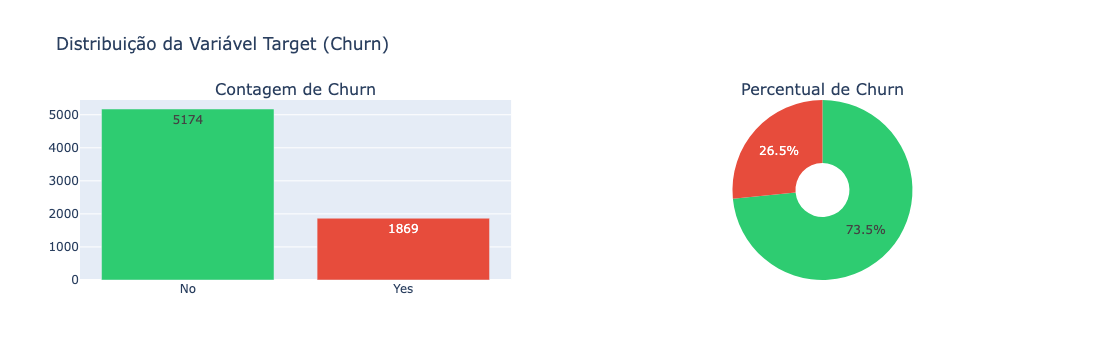

Total de clientes: 7043
Clientes que permaneceram (No): 5174 (73.5%)
Clientes que cancelaram (Yes): 1869 (26.5%)



In [93]:
#Analisando a variável target

print("="*60)
print("DISTRIBUIÇÃO DO CHURN:")
print("="*60)
churn_counts = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100

fig = make_subplots(
    rows=1, cols=2,
    subplot_titles=('Contagem de Churn', 'Percentual de Churn'),
    specs=[[{'type':'bar'}, {'type':'pie'}]]
)

fig.add_trace(
    go.Bar(x=churn_counts.index, y=churn_counts.values,
           text=churn_counts.values, textposition='auto',
           marker_color=['#2ecc71', '#e74c3c']),
    row=1, col=1
)

fig.add_trace(
    go.Pie(labels=churn_counts.index, values=churn_counts.values,
           hole=.3, marker_colors=['#2ecc71', '#e74c3c']),
    row=1, col=2
)

fig.update_layout(height=400, showlegend=False,
                  title_text="Distribuição da Variável Target (Churn)")
fig.show()

print(f"Total de clientes: {len(df)}")
print(f"Clientes que permaneceram (No): {churn_counts['No']} ({churn_percentage['No']:.1f}%)")
print(f"Clientes que cancelaram (Yes): {churn_counts['Yes']} ({churn_percentage['Yes']:.1f}%)")
print("\n" + "="*50)

Text(0.5, 1.0, 'Distribuição de Tenure por Status de Churn')

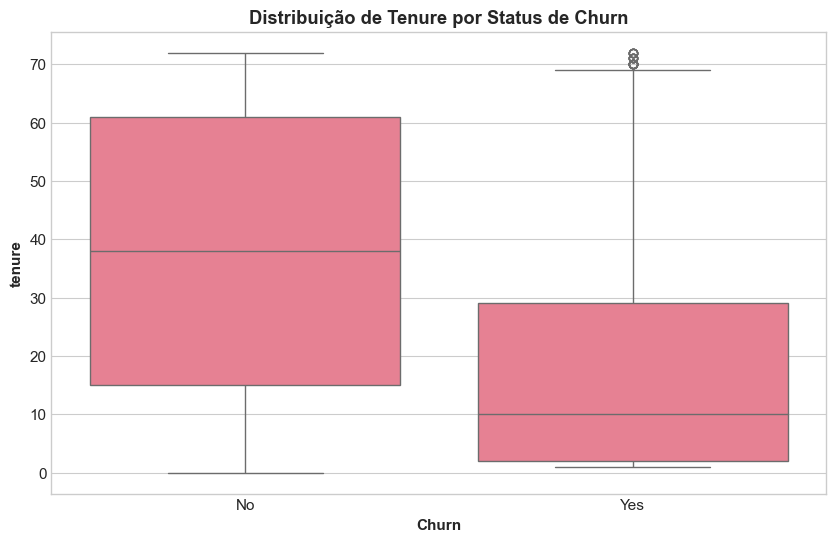

In [270]:
   # Exemplo: Tenure vs Churn
   plt.figure(figsize=(10,6))
   sns.boxplot(data=df, x='Churn', y='tenure')
   plt.title('Distribuição de Tenure por Status de Churn')

Text(0.5, 1.0, 'Distribuição de MonthlyCharges por Churn')

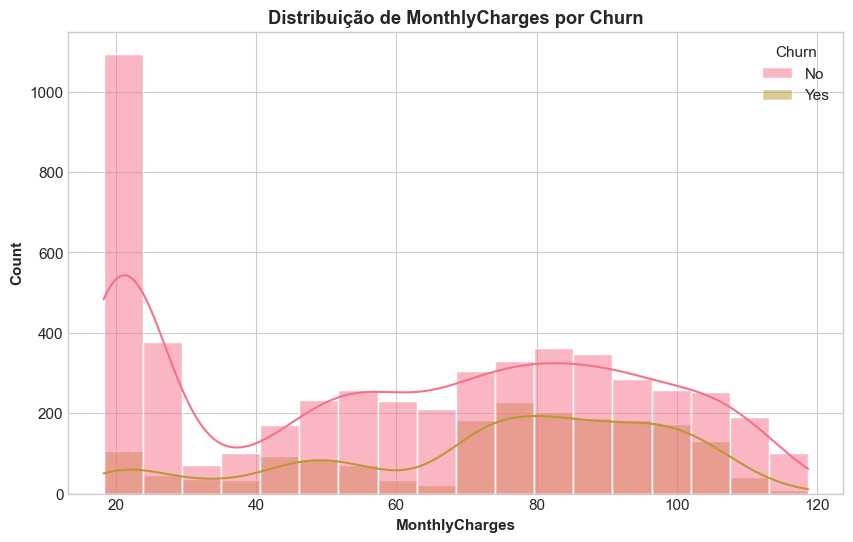

In [252]:
# Análise de distribuição de MonthlyCharges
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True)
plt.title('Distribuição de MonthlyCharges por Churn')

#### 4.1.2. Distribuições (Genero, Idade, Parceiro, Dependentes)

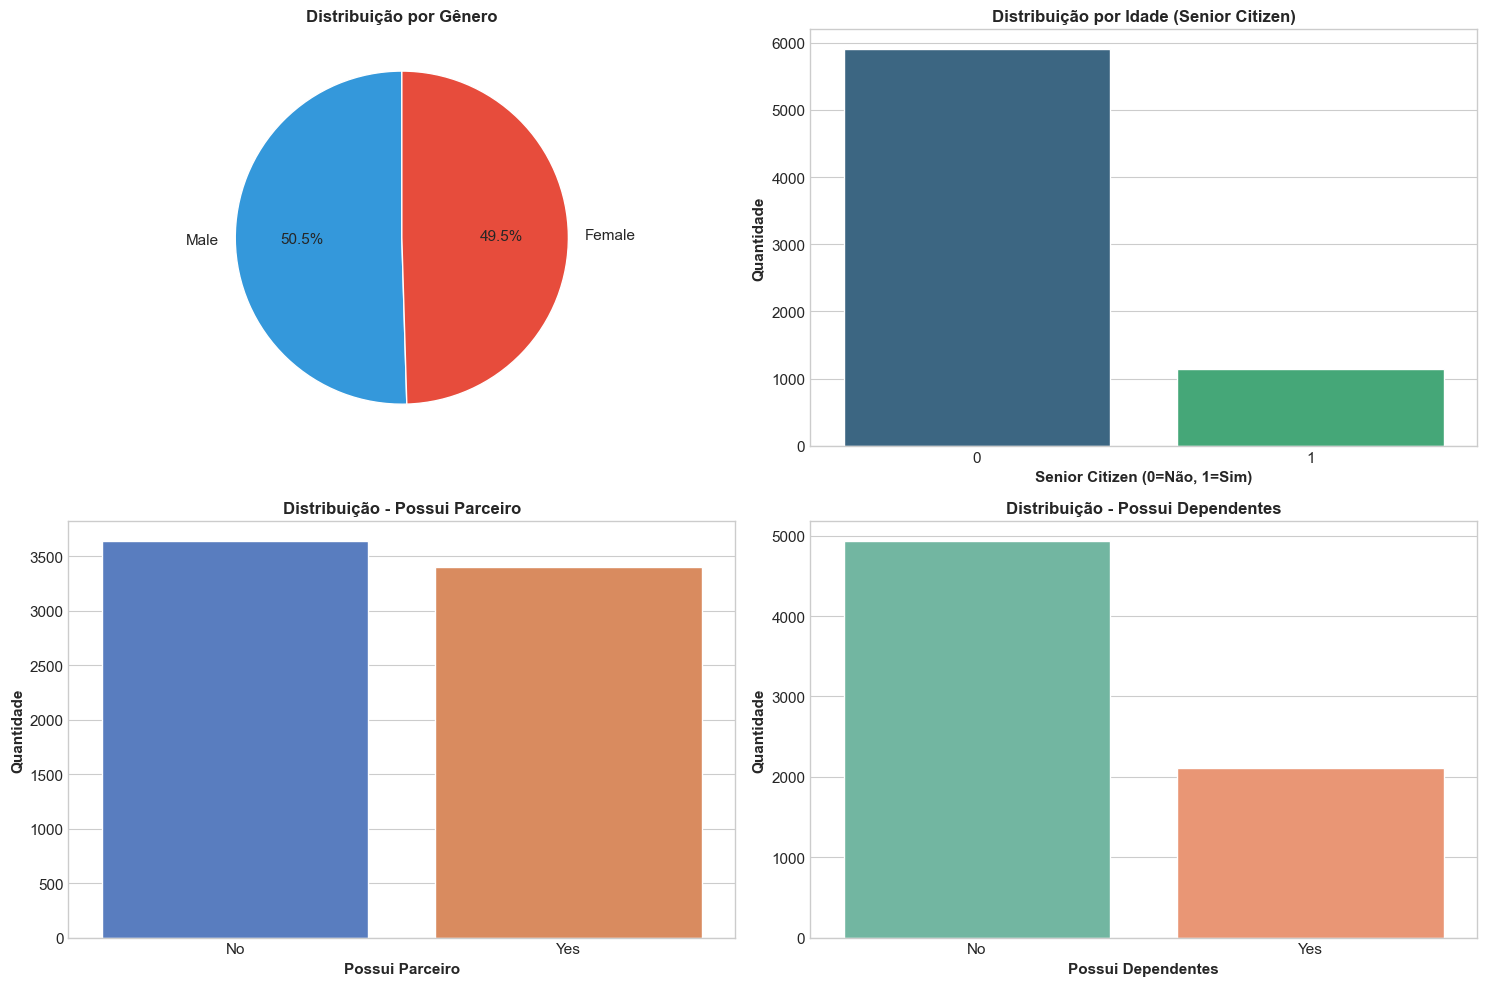

In [98]:
#Criar subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

#Gender
gender_counts = df['gender'].value_counts()
axes[0, 0].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%',
               colors=['#3498db', '#e74c3c'], startangle=90)
axes[0, 0].set_title('Distribuição por Gênero', fontweight='bold', fontsize=12)

#SeniorCitizen
senior_counts = df['SeniorCitizen'].value_counts()
sns.barplot(x=senior_counts.index, y=senior_counts.values, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Distribuição por Idade (Senior Citizen)', fontweight='bold', fontsize=12)
axes[0, 1].set_xlabel('Senior Citizen (0=Não, 1=Sim)')
axes[0, 1].set_ylabel('Quantidade')

#Partner
partner_counts = df['Partner'].value_counts()
sns.barplot(x=partner_counts.index, y=partner_counts.values, ax=axes[1, 0], palette='muted')
axes[1, 0].set_title('Distribuição - Possui Parceiro', fontweight='bold', fontsize=12)
axes[1, 0].set_xlabel('Possui Parceiro')
axes[1, 0].set_ylabel('Quantidade')

#Dependents
dep_counts = df['Dependents'].value_counts()
sns.barplot(x=dep_counts.index, y=dep_counts.values, ax=axes[1, 1], palette='Set2')
axes[1, 1].set_title('Distribuição - Possui Dependentes', fontweight='bold', fontsize=12)
axes[1, 1].set_xlabel('Possui Dependentes')
axes[1, 1].set_ylabel('Quantidade')

plt.tight_layout()
plt.show()

#### 4.1.3. Churn por (Genero, Idade, Parceiro, Dependentes)

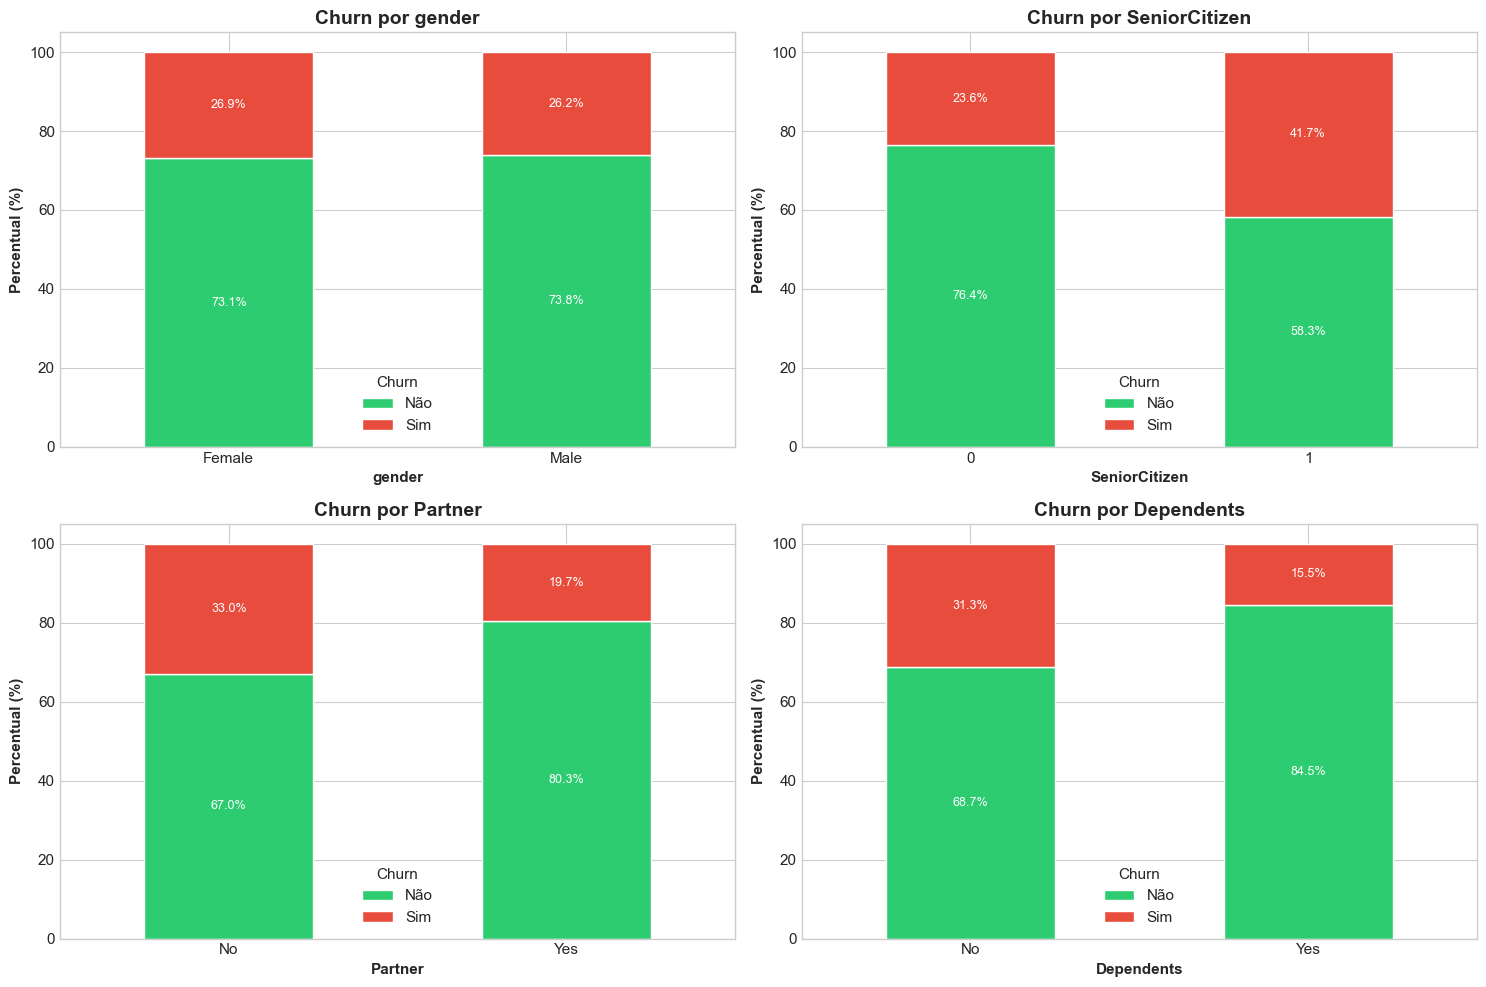

In [101]:
# Análise demográfica dos clientes

demographic_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
fig = plt.figure(figsize=(15, 10))

for i, col in enumerate(demographic_cols, 1):
    plt.subplot(2, 2, i)

    # Calcular percentuais
    temp_df = df.groupby([col, 'Churn']).size().unstack()
    temp_percent = temp_df.div(temp_df.sum(axis=1), axis=0) * 100

    # Plot
    temp_percent.plot(kind='bar', stacked=True,
                      color=['#2ecc71', '#e74c3c'], ax=plt.gca())
    plt.title(f'Churn por {col}', fontsize=14, fontweight='bold')
    plt.xlabel(col)
    plt.ylabel('Percentual (%)')
    plt.legend(title='Churn', labels=['Não', 'Sim'])
    plt.xticks(rotation=0)

    # Adicionar valores nas barras
    for p in plt.gca().patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0:
            plt.gca().annotate(f'{height:.1f}%',
                             (x + width/2, y + height/2),
                             ha='center', va='center',
                             fontsize=9, color='white')

plt.tight_layout()
plt.show()

### 4.2 Variáveis de Serviços

#### 4.2.1. Analise dos serviços contratados

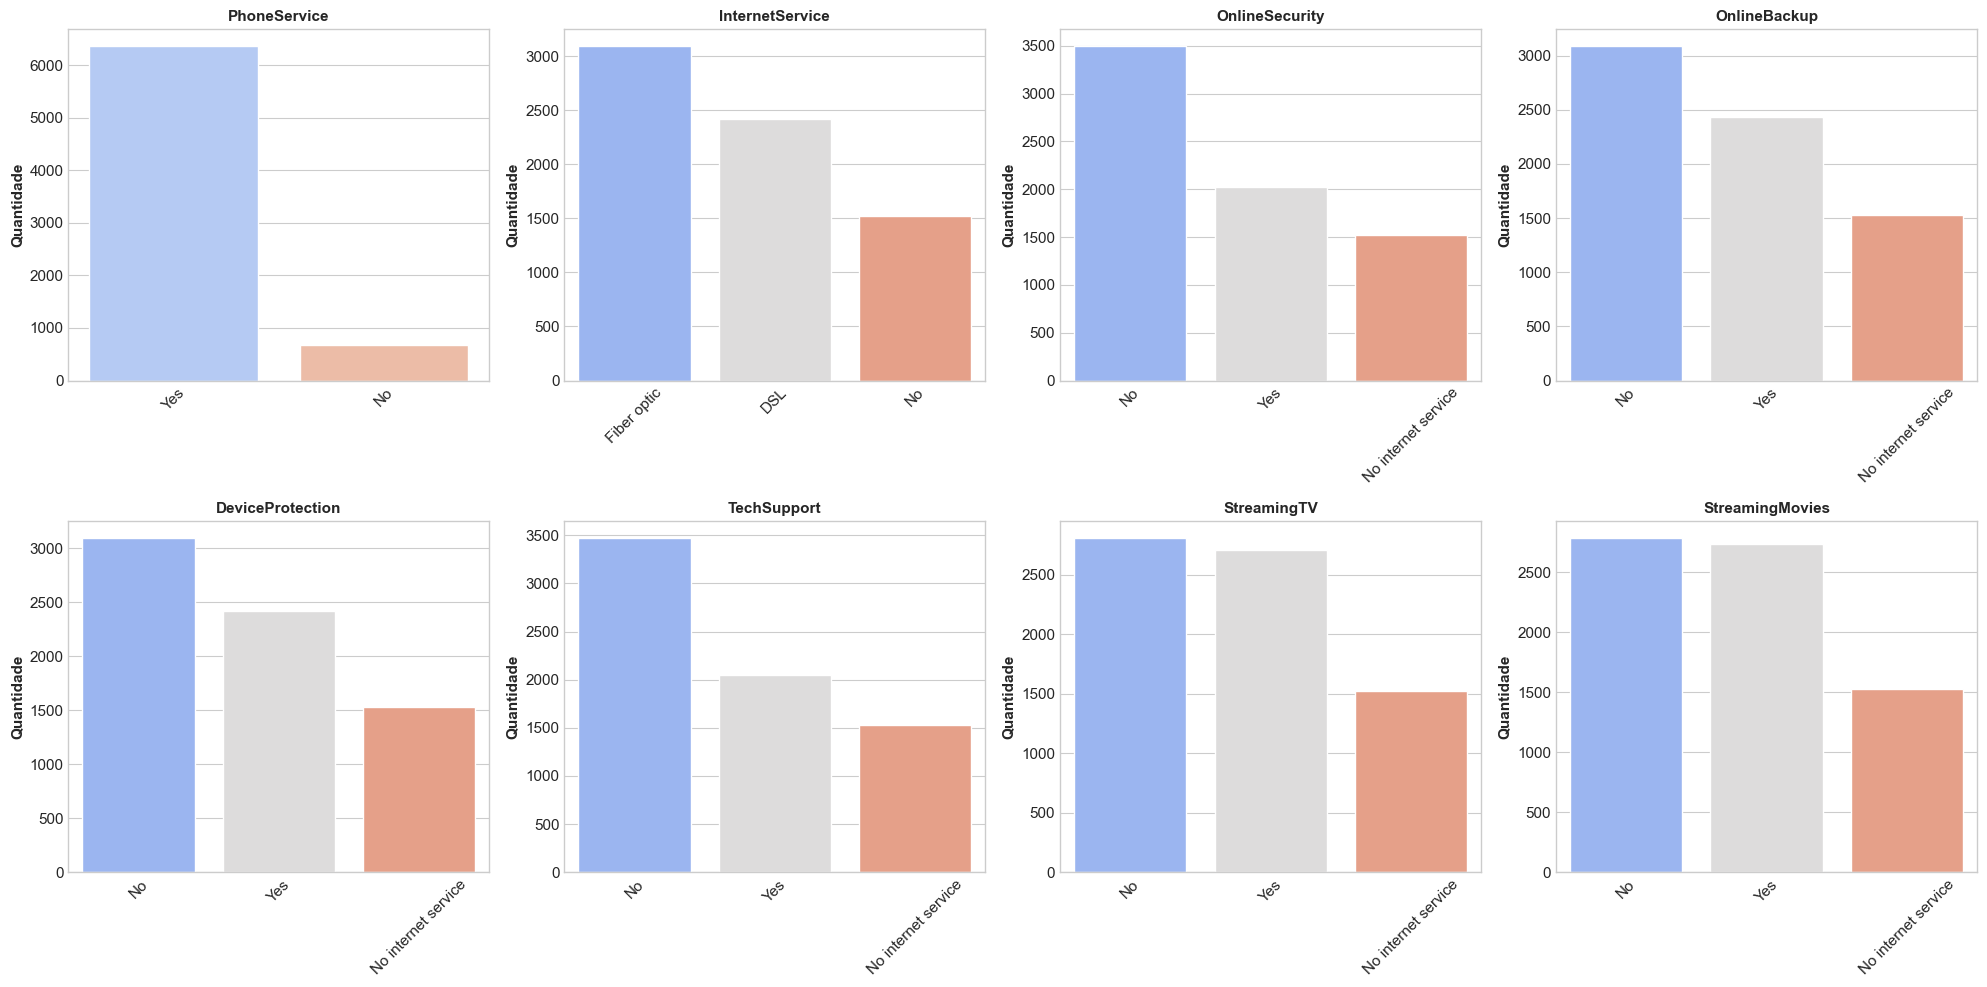

In [105]:
# Serviços principais
service_cols = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for idx, col in enumerate(service_cols):
    counts = df[col].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=axes[idx], palette='coolwarm')
    axes[idx].set_title(col, fontweight='bold', fontsize=11)
    axes[idx].set_xlabel('')
    axes[idx].set_ylabel('Quantidade')
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### 4.2.2. Churn por serviços contratados

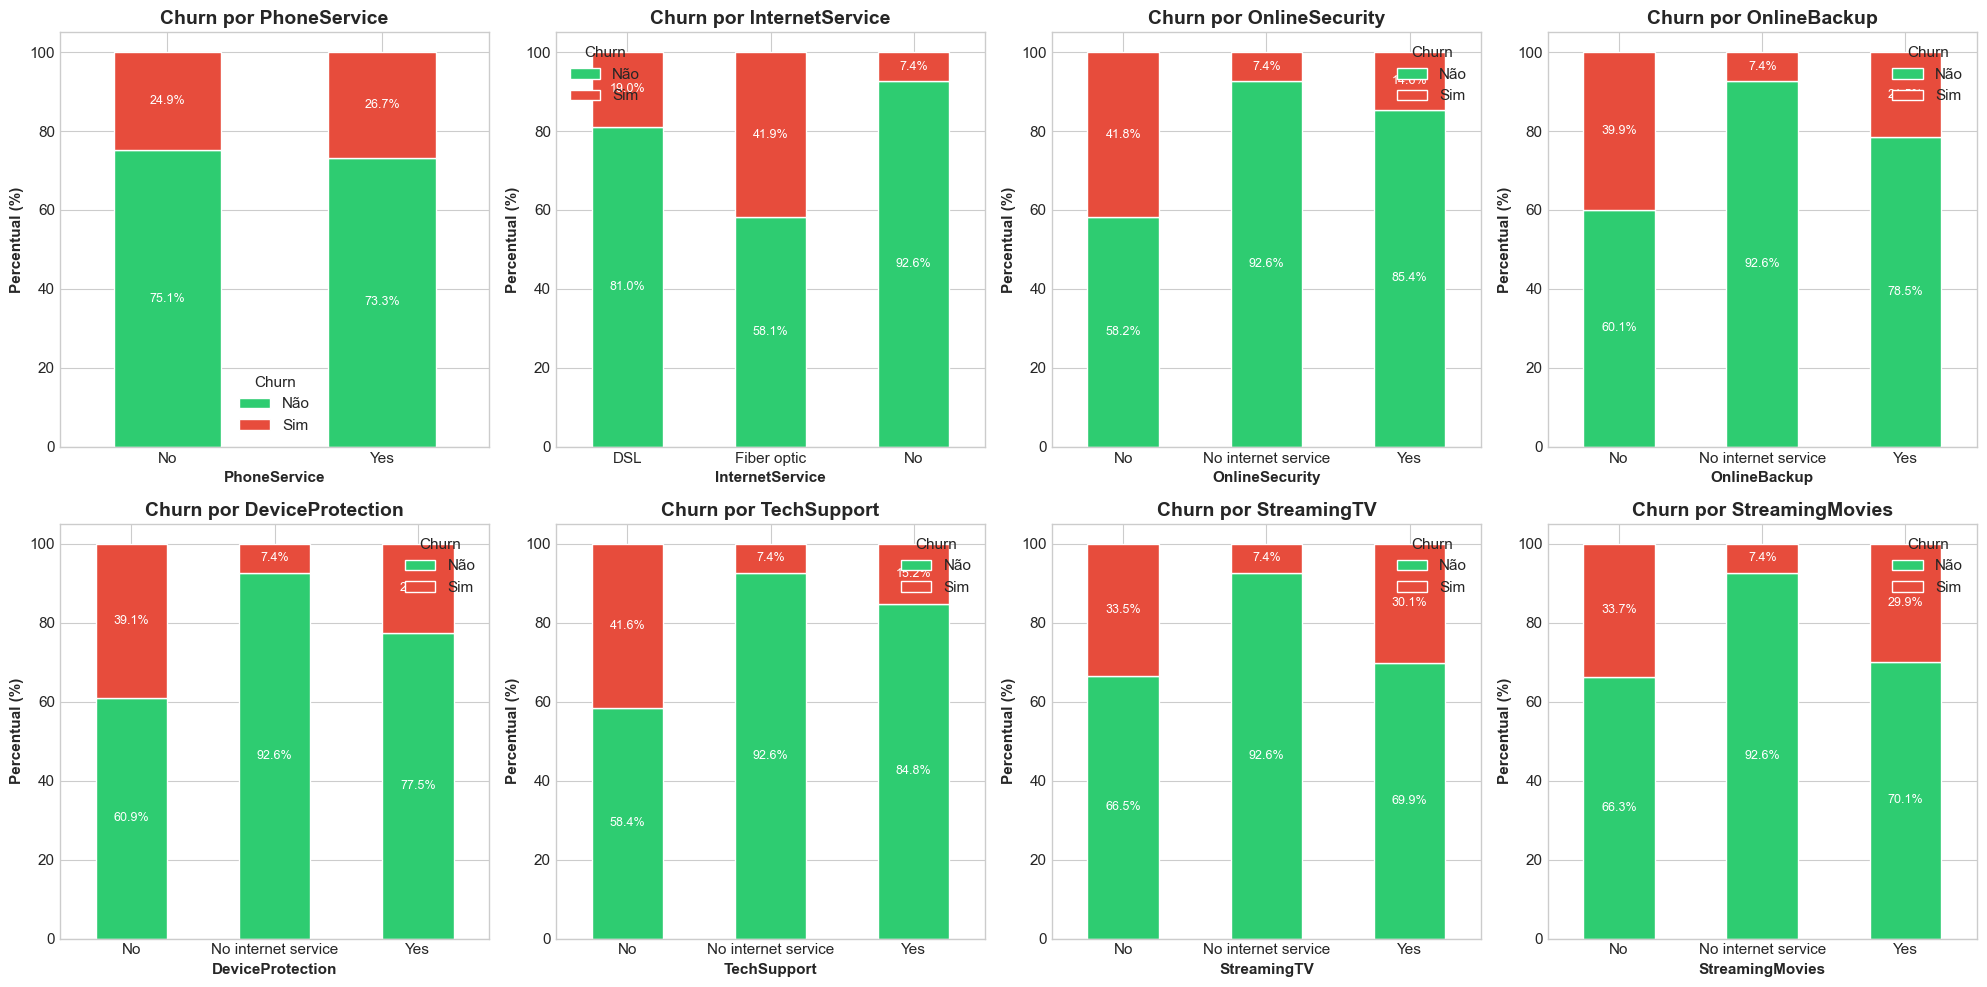

In [108]:
service_cols = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
                'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
# Flatten the axes array for easier iteration
axes = axes.flatten()

for i, col in enumerate(service_cols):
    ax = axes[i]

    # Calcular percentuais
    temp_df = df.groupby([col, 'Churn']).size().unstack()
    temp_percent = temp_df.div(temp_df.sum(axis=1), axis=0) * 100

    # Plot
    temp_percent.plot(kind='bar', stacked=True,
                      color=['#2ecc71', '#e74c3c'], ax=ax)
    ax.set_title(f'Churn por {col}', fontsize=14, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Percentual (%)')
    ax.legend(title='Churn', labels=['Não', 'Sim'])
    ax.tick_params(axis='x', rotation=0)

    # Adicionar valores nas barras
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        if height > 0:
            ax.annotate(f'{height:.1f}%',
                             (x + width/2, y + height/2),
                             ha='center', va='center',
                             fontsize=9, color='white')

plt.tight_layout()
plt.show()

#### 4.2.3. Taxa de Serviços Contratados

In [111]:
# Estatísticas Taxa de adoção
print("\nTaxa de Adoção de Serviços:\n")

for col in service_cols:
    yes_pct = (df[col] == 'Yes').mean() * 100
    print(f"  • {col}: {yes_pct:.1f}%")


Taxa de Adoção de Serviços:

  • PhoneService: 90.3%
  • InternetService: 0.0%
  • OnlineSecurity: 28.7%
  • OnlineBackup: 34.5%
  • DeviceProtection: 34.4%
  • TechSupport: 29.0%
  • StreamingTV: 38.4%
  • StreamingMovies: 38.8%


### 4.3 Variáveis Financeiras

#### 4.3.1 Analise Financeira (Distribuição por Serviço)

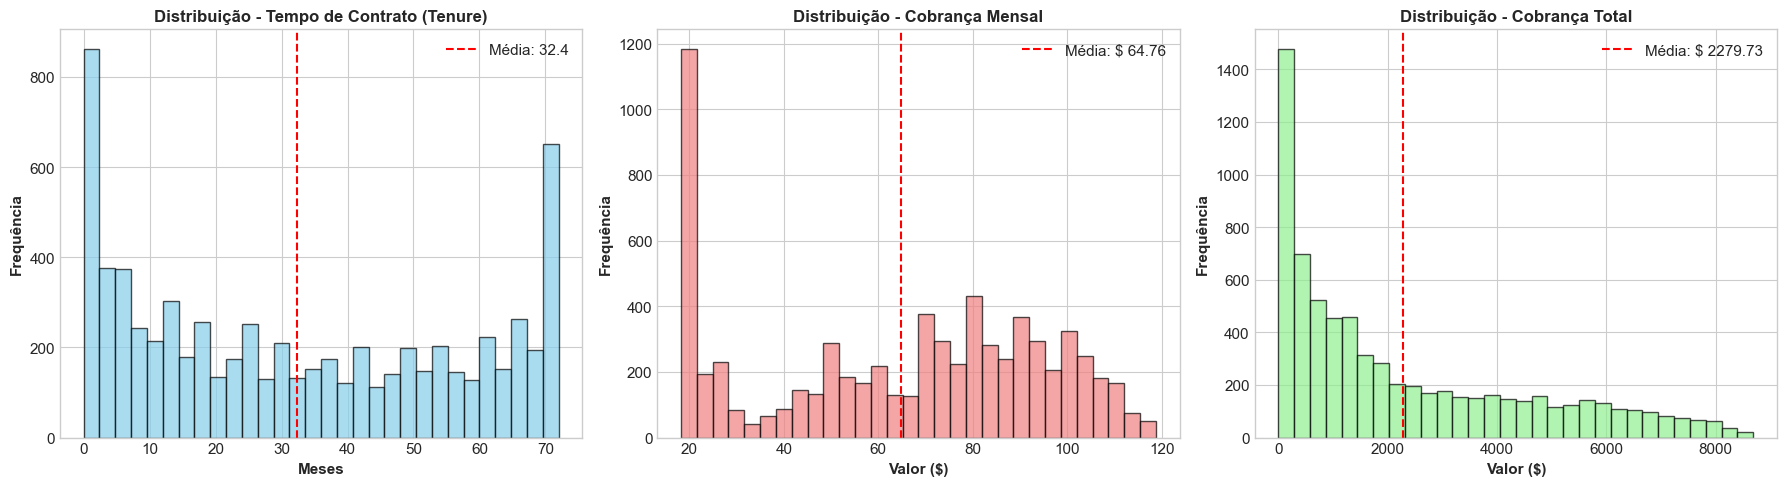

In [115]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tenure
axes[0].hist(df['tenure'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
axes[0].set_title('Distribuição - Tempo de Contrato (Tenure)', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Meses')
axes[0].set_ylabel('Frequência')
axes[0].axvline(df['tenure'].mean(), color='red', linestyle='--', label=f'Média: {df["tenure"].mean():.1f}')
axes[0].legend()

# MonthlyCharges
axes[1].hist(df['MonthlyCharges'], bins=30, color='lightcoral', edgecolor='black', alpha=0.7)
axes[1].set_title('Distribuição - Cobrança Mensal', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Valor ($)')
axes[1].set_ylabel('Frequência')
axes[1].axvline(df['MonthlyCharges'].mean(), color='red', linestyle='--',
                label=f'Média: $ {df["MonthlyCharges"].mean():.2f}')
axes[1].legend()

# TotalCharges
axes[2].hist(df['TotalCharges'], bins=30, color='lightgreen', edgecolor='black', alpha=0.7)
axes[2].set_title('Distribuição - Cobrança Total', fontweight='bold', fontsize=12)
axes[2].set_xlabel('Valor ($)')
axes[2].set_ylabel('Frequência')
axes[2].axvline(df['TotalCharges'].mean(), color='red', linestyle='--',
                label=f'Média: $ {df["TotalCharges"].mean():.2f}')
axes[2].legend()

plt.tight_layout()
plt.show()


#### 4.3.2 Distribuição de Churn por Serviço

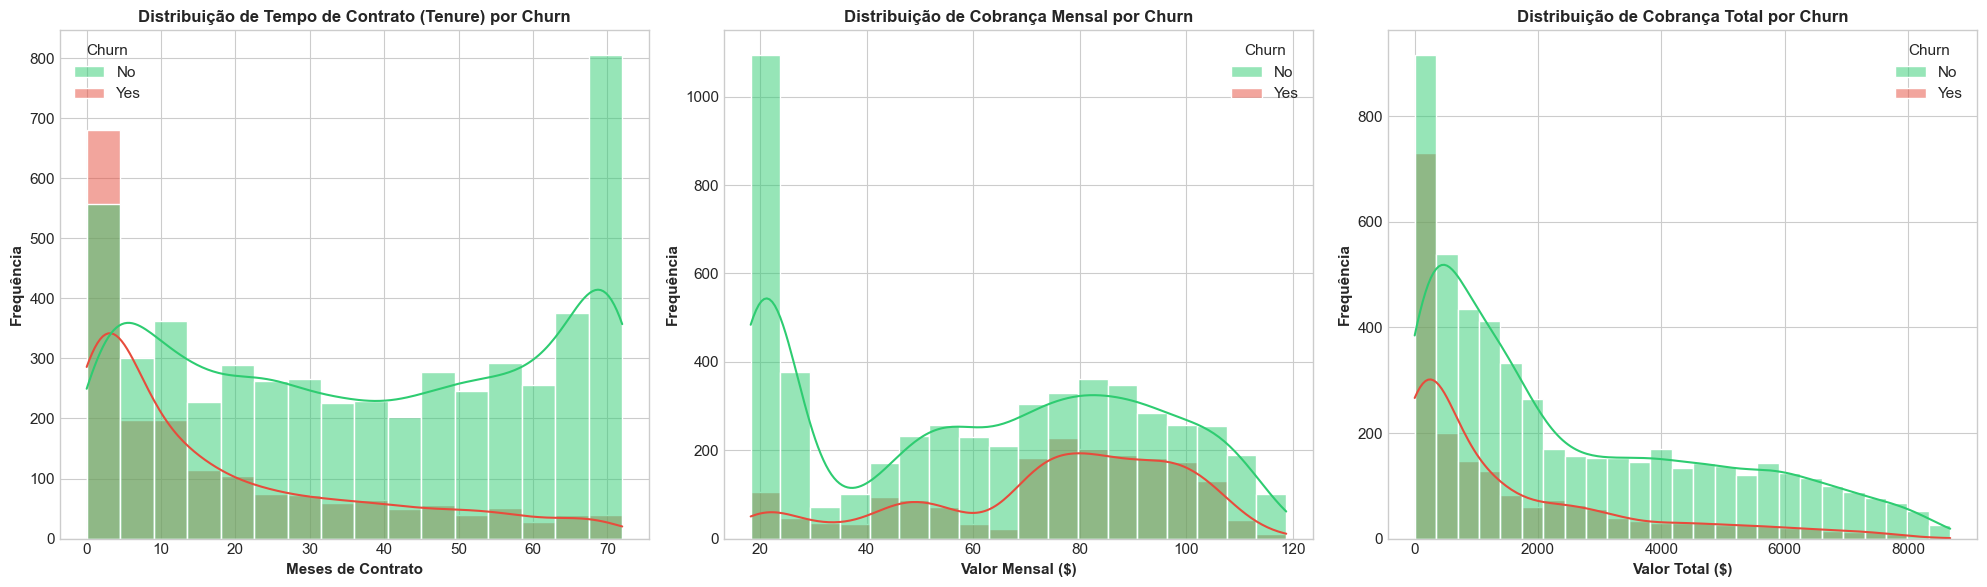

In [118]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Tenure by Churn
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, ax=axes[0], palette=['#2ecc71', '#e74c3c'])
axes[0].set_title('Distribuição de Tempo de Contrato (Tenure) por Churn', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Meses de Contrato')
axes[0].set_ylabel('Frequência')

# MonthlyCharges by Churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', kde=True, ax=axes[1], palette=['#2ecc71', '#e74c3c'])
axes[1].set_title('Distribuição de Cobrança Mensal por Churn', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Valor Mensal ($)')
axes[1].set_ylabel('Frequência')

# TotalCharges by Churn
sns.histplot(data=df, x='TotalCharges', hue='Churn', kde=True, ax=axes[2], palette=['#2ecc71', '#e74c3c'])
axes[2].set_title('Distribuição de Cobrança Total por Churn', fontweight='bold', fontsize=12)
axes[2].set_xlabel('Valor Total ($)')
axes[2].set_ylabel('Frequência')

plt.tight_layout()
plt.show()

#### 4.3.3 Estatísticas financeiras

In [121]:
# Estatísticas financeiras
print("Estatísticas financeiras")
print("="*60)
print(f"  • Tenure médio: {df['tenure'].mean():.1f} meses")
print(f"  • Cobrança mensal média: {df['MonthlyCharges'].mean():.2f}")
print(f"  • Cobrança total média: {df['TotalCharges'].mean():.2f}")
print(f"  • Receita total: {df['MonthlyCharges'].sum():,.2f}/mês")
print("="*60)

Estatísticas financeiras
  • Tenure médio: 32.4 meses
  • Cobrança mensal média: 64.76
  • Cobrança total média: 2279.73
  • Receita total: 456,116.60/mês


### 4.4 Tipo de Contrato e Pagamento

#### 4.4.1 Visualizando o Tipo de Contrato e Pagamento

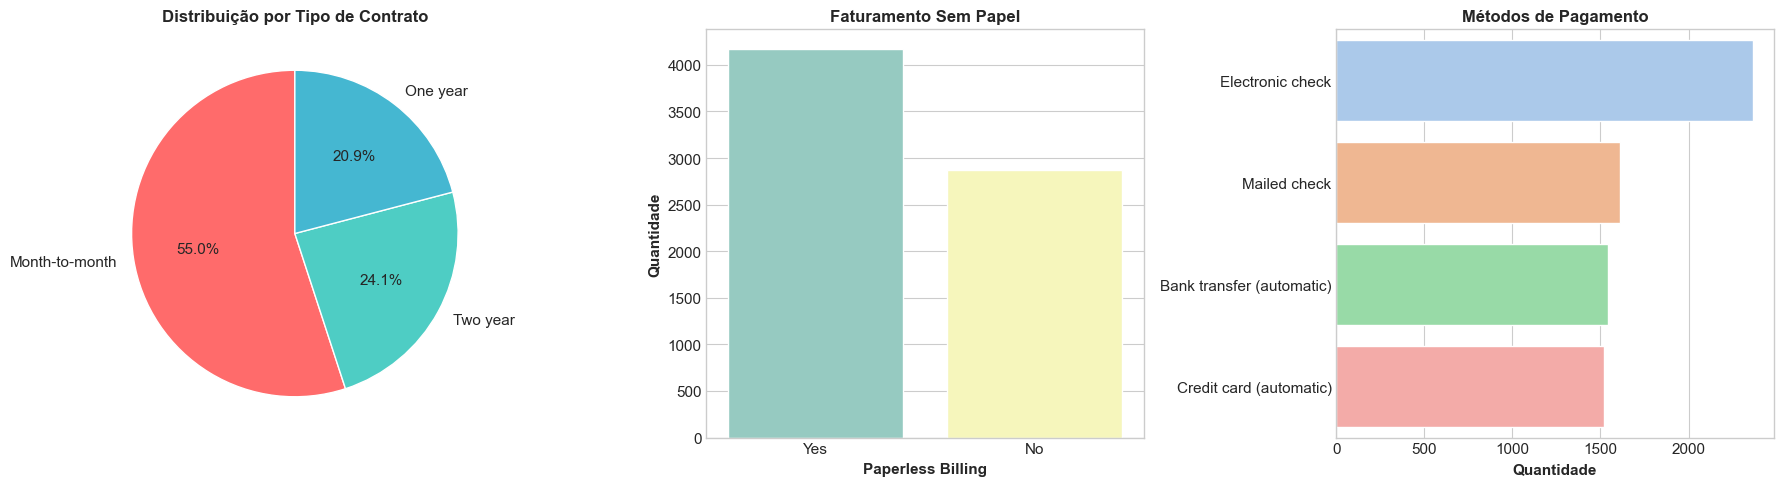

In [125]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Contract
contract_counts = df['Contract'].value_counts()
axes[0].pie(contract_counts, labels=contract_counts.index, autopct='%1.1f%%',
            colors=['#FF6B6B', '#4ECDC4', '#45B7D1'], startangle=90)
axes[0].set_title('Distribuição por Tipo de Contrato', fontweight='bold', fontsize=12)

# PaperlessBilling
billing_counts = df['PaperlessBilling'].value_counts()
sns.barplot(x=billing_counts.index, y=billing_counts.values, ax=axes[1], palette='Set3')
axes[1].set_title('Faturamento Sem Papel', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Paperless Billing')
axes[1].set_ylabel('Quantidade')

# PaymentMethod
payment_counts = df['PaymentMethod'].value_counts()
sns.barplot(y=payment_counts.index, x=payment_counts.values, ax=axes[2], palette='pastel')
axes[2].set_title('Métodos de Pagamento', fontweight='bold', fontsize=12)
axes[2].set_xlabel('Quantidade')
axes[2].set_ylabel('')

plt.tight_layout()
plt.show()

#### 4.4.2 Visualizando o Churn por Tipo de Contrato e Pagamento

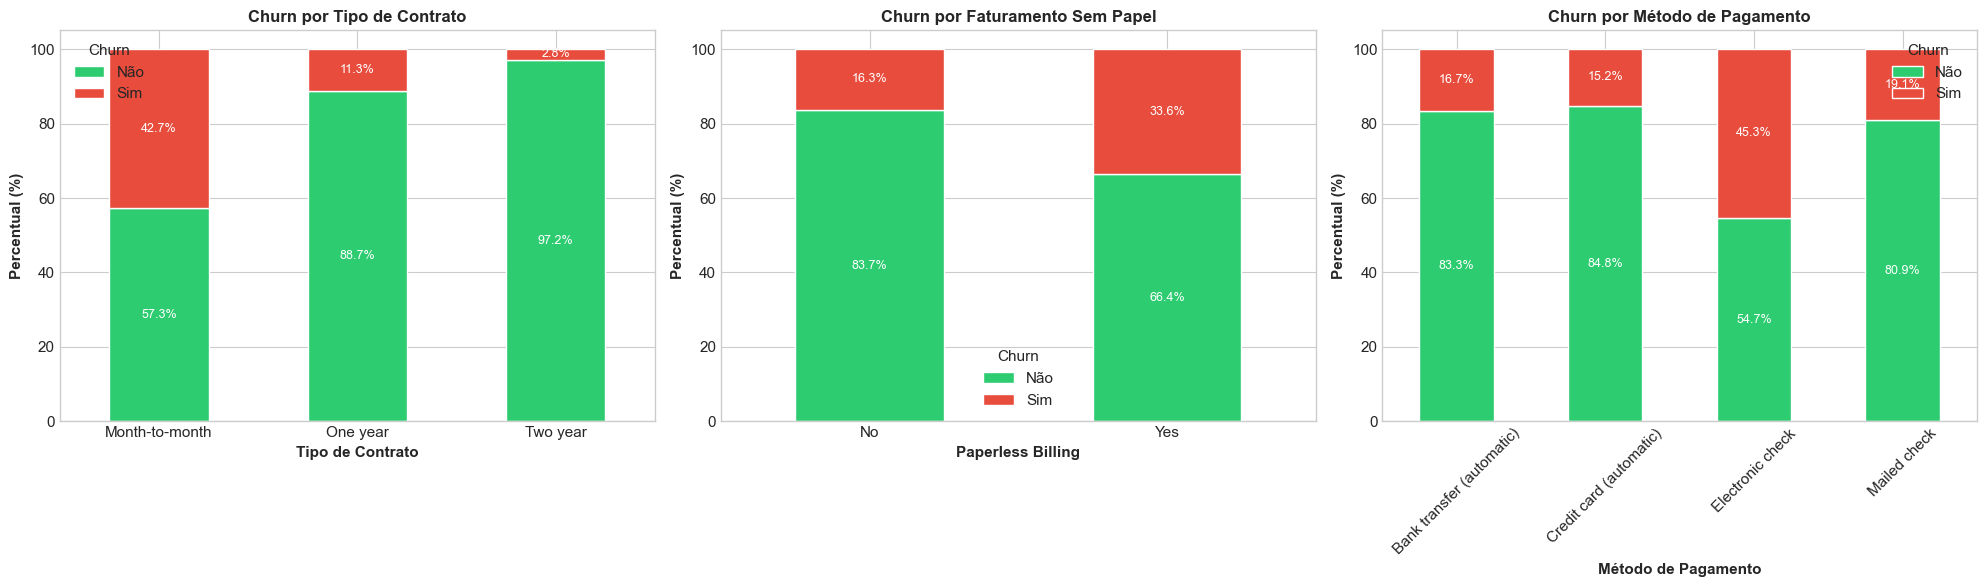

In [128]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Contract by Churn
temp_df_contract = df.groupby(['Contract', 'Churn']).size().unstack()
temp_percent_contract = temp_df_contract.div(temp_df_contract.sum(axis=1), axis=0) * 100
temp_percent_contract.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], ax=axes[0])
axes[0].set_title('Churn por Tipo de Contrato', fontweight='bold', fontsize=12)
axes[0].set_xlabel('Tipo de Contrato')
axes[0].set_ylabel('Percentual (%)')
axes[0].legend(title='Churn', labels=['Não', 'Sim'])
axes[0].tick_params(axis='x', rotation=0)
for p in axes[0].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        axes[0].annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='white')

# PaperlessBilling by Churn
temp_df_billing = df.groupby(['PaperlessBilling', 'Churn']).size().unstack()
temp_percent_billing = temp_df_billing.div(temp_df_billing.sum(axis=1), axis=0) * 100
temp_percent_billing.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], ax=axes[1])
axes[1].set_title('Churn por Faturamento Sem Papel', fontweight='bold', fontsize=12)
axes[1].set_xlabel('Paperless Billing')
axes[1].set_ylabel('Percentual (%)')
axes[1].legend(title='Churn', labels=['Não', 'Sim'])
axes[1].tick_params(axis='x', rotation=0)
for p in axes[1].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        axes[1].annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='white')

# PaymentMethod by Churn
temp_df_payment = df.groupby(['PaymentMethod', 'Churn']).size().unstack()
temp_percent_payment = temp_df_payment.div(temp_df_payment.sum(axis=1), axis=0) * 100
temp_percent_payment.plot(kind='bar', stacked=True, color=['#2ecc71', '#e74c3c'], ax=axes[2])
axes[2].set_title('Churn por Método de Pagamento', fontweight='bold', fontsize=12)
axes[2].set_xlabel('Método de Pagamento')
axes[2].set_ylabel('Percentual (%)')
axes[2].legend(title='Churn', labels=['Não', 'Sim'])
axes[2].tick_params(axis='x', rotation=45)
for p in axes[2].patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    if height > 0:
        axes[2].annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center', fontsize=9, color='white')

plt.tight_layout()
plt.show()

#### 4.4.3 Resumo de Contratos e Pagamentos

In [131]:
print('--- Resumo de Contratos ---')
display(contract_counts.to_frame(name='Count'))

--- Resumo de Contratos ---


,Count
Contract,
Month-to-month,3875
Two year,1695
One year,1473


In [133]:
print('\n--- Resumo de Faturamento Sem Papel ---')
display(billing_counts.to_frame(name='Count'))


--- Resumo de Faturamento Sem Papel ---


,Count
PaperlessBilling,
Yes,4171
No,2872


In [135]:
print('\n--- Resumo de Métodos de Pagamento ---')
display(payment_counts.to_frame(name='Count'))


--- Resumo de Métodos de Pagamento ---


,Count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


## Análise de Cohort 

A análise de cohort permite entender como a retenção varia ao longo do tempo para diferentes grupos de clientes.

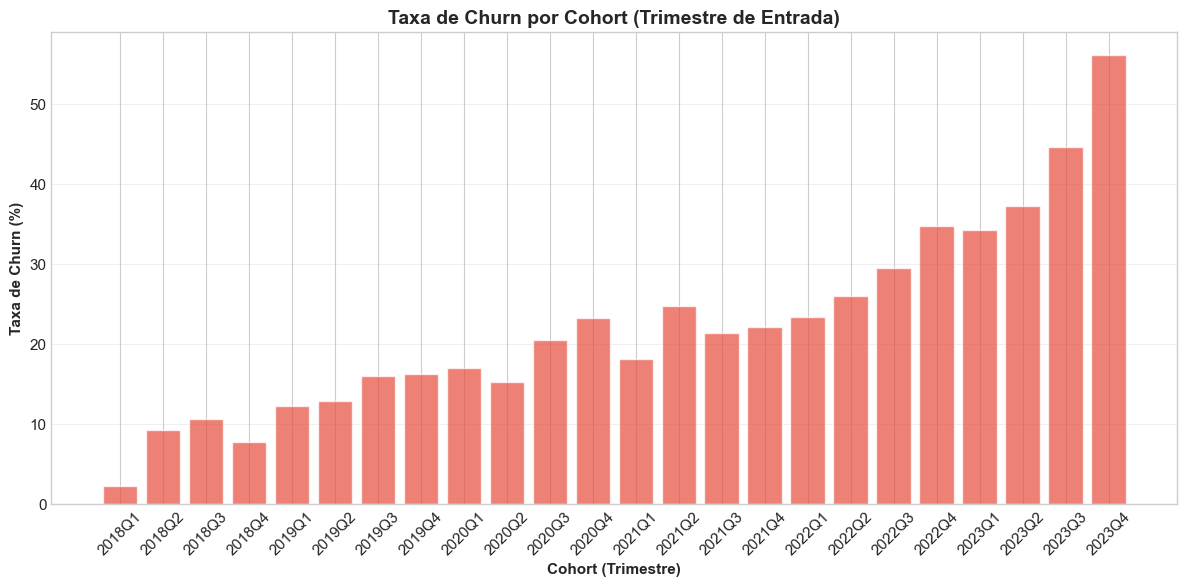

In [140]:
# =============================================================================
# ANÁLISE DE COHORT - RETENÇÃO AO LONGO DO TEMPO
# =============================================================================

def analise_cohort_tenure(df):
    """Análise de cohort baseada no tempo de contrato"""
    
    # Criar cohorts baseadas no ano/mês de entrada (simulado)
    df_cohort = df.copy()
    
    # Simular data de entrada baseada no tenure
    import datetime
    referencia = datetime.datetime(2023, 12, 31)
    df_cohort['Data_Entrada'] = df_cohort['tenure'].apply(
        lambda x: referencia - datetime.timedelta(days=x*30)
    )
    df_cohort['Cohort_Mes'] = df_cohort['Data_Entrada'].dt.to_period('M')
    df_cohort['Cohort_Trimestre'] = df_cohort['Data_Entrada'].dt.to_period('Q')
    
    # Taxa de churn por cohort
    cohort_churn = df_cohort.groupby('Cohort_Trimestre')['Churn'].apply(
        lambda x: (x == 'Yes').mean() * 100
    ).reset_index()
    
    # Plot
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.bar(cohort_churn['Cohort_Trimestre'].astype(str), 
           cohort_churn['Churn'], 
           color=CORES['churn'], alpha=0.7)
    ax.set_title('Taxa de Churn por Cohort (Trimestre de Entrada)', fontsize=14, fontweight='bold')
    ax.set_xlabel('Cohort (Trimestre)')
    ax.set_ylabel('Taxa de Churn (%)')
    ax.tick_params(axis='x', rotation=45)
    plt.grid(axis='y', alpha=0.3)
    plt.tight_layout()
    plt.show()
    
    return df_cohort

df_com_cohort = analise_cohort_tenure(df)

<a id="variavel-target"></a>
## 5. Análise da Variável Alvo (Churn)

Esta é a variável mais importante do projeto.

#### 5.1 Distribuição de Churn

In [144]:
churn_counts = df['Churn'].value_counts()
churn_pct = df['Churn'].value_counts(normalize=True) * 100

print(f"\nDistribuição de Churn:\n")
print(f"  • Não Churn (No): {churn_counts.get('No', 0):,} ({churn_pct.get('No', 0):.1f}%)")
print(f"  • Churn (Yes): {churn_counts.get('Yes', 0):,} ({churn_pct.get('Yes', 0):.1f}%)")


Distribuição de Churn:

  • Não Churn (No): 5,174 (73.5%)
  • Churn (Yes): 1,869 (26.5%)


#### 5.2 Visualização do Churn

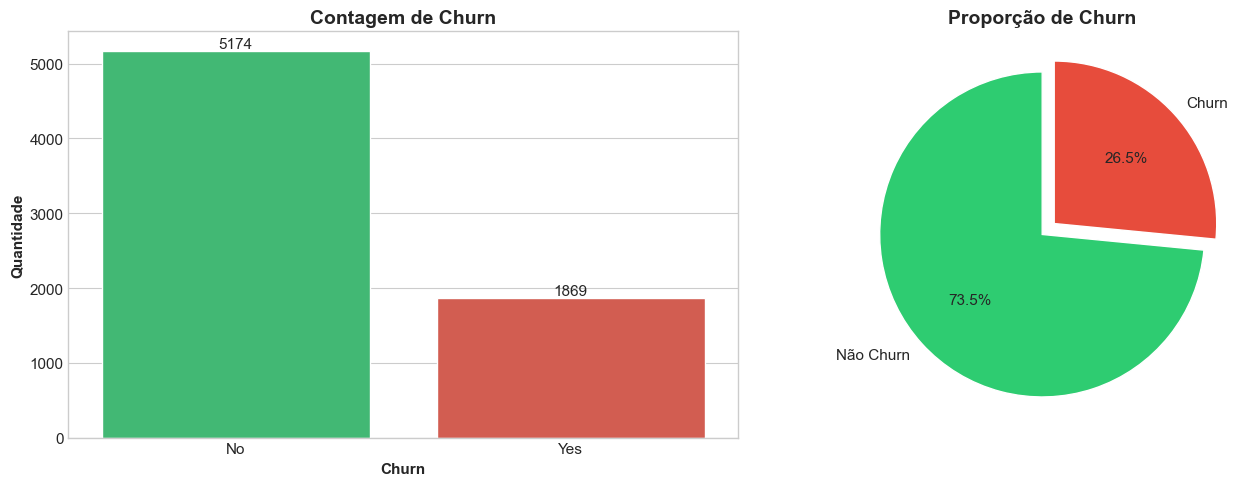

In [147]:
# Visualização
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
sns.countplot(x='Churn', data=df, ax=axes[0], palette=['#2ecc71', '#e74c3c'])
axes[0].set_title('Contagem de Churn', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Quantidade')
axes[0].set_xlabel('Churn')

# Adicionar valores nas barras
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%d')

# Gráfico de pizza
colors = ['#2ecc71', '#e74c3c']
axes[1].pie(churn_counts, labels=['Não Churn', 'Churn'], autopct='%1.1f%%',
            colors=colors, startangle=90, explode=(0, 0.1))
axes[1].set_title('Proporção de Churn', fontweight='bold', fontsize=14)

plt.tight_layout()
plt.show()

## Insights Iniciais

**Observação:** O dataset está **desbalanceado**, com aproximadamente 73% de clientes que não fizeram churn e 27% que fizeram.

**Implicação:** Na modelagem, será necessário o uso de técnicas para lidar com desbalanceamento:

- Class weights
- SMOTE
- Métricas adequadas (AUC-ROC, F1-Score)


<a id="aalise-bivariada"></a>
## 6. Análise Bivariada - Relação com Churn

Explorar como cada variável se relaciona com o Churn.

### 6.1 Churn vs Variáveis Demográficas

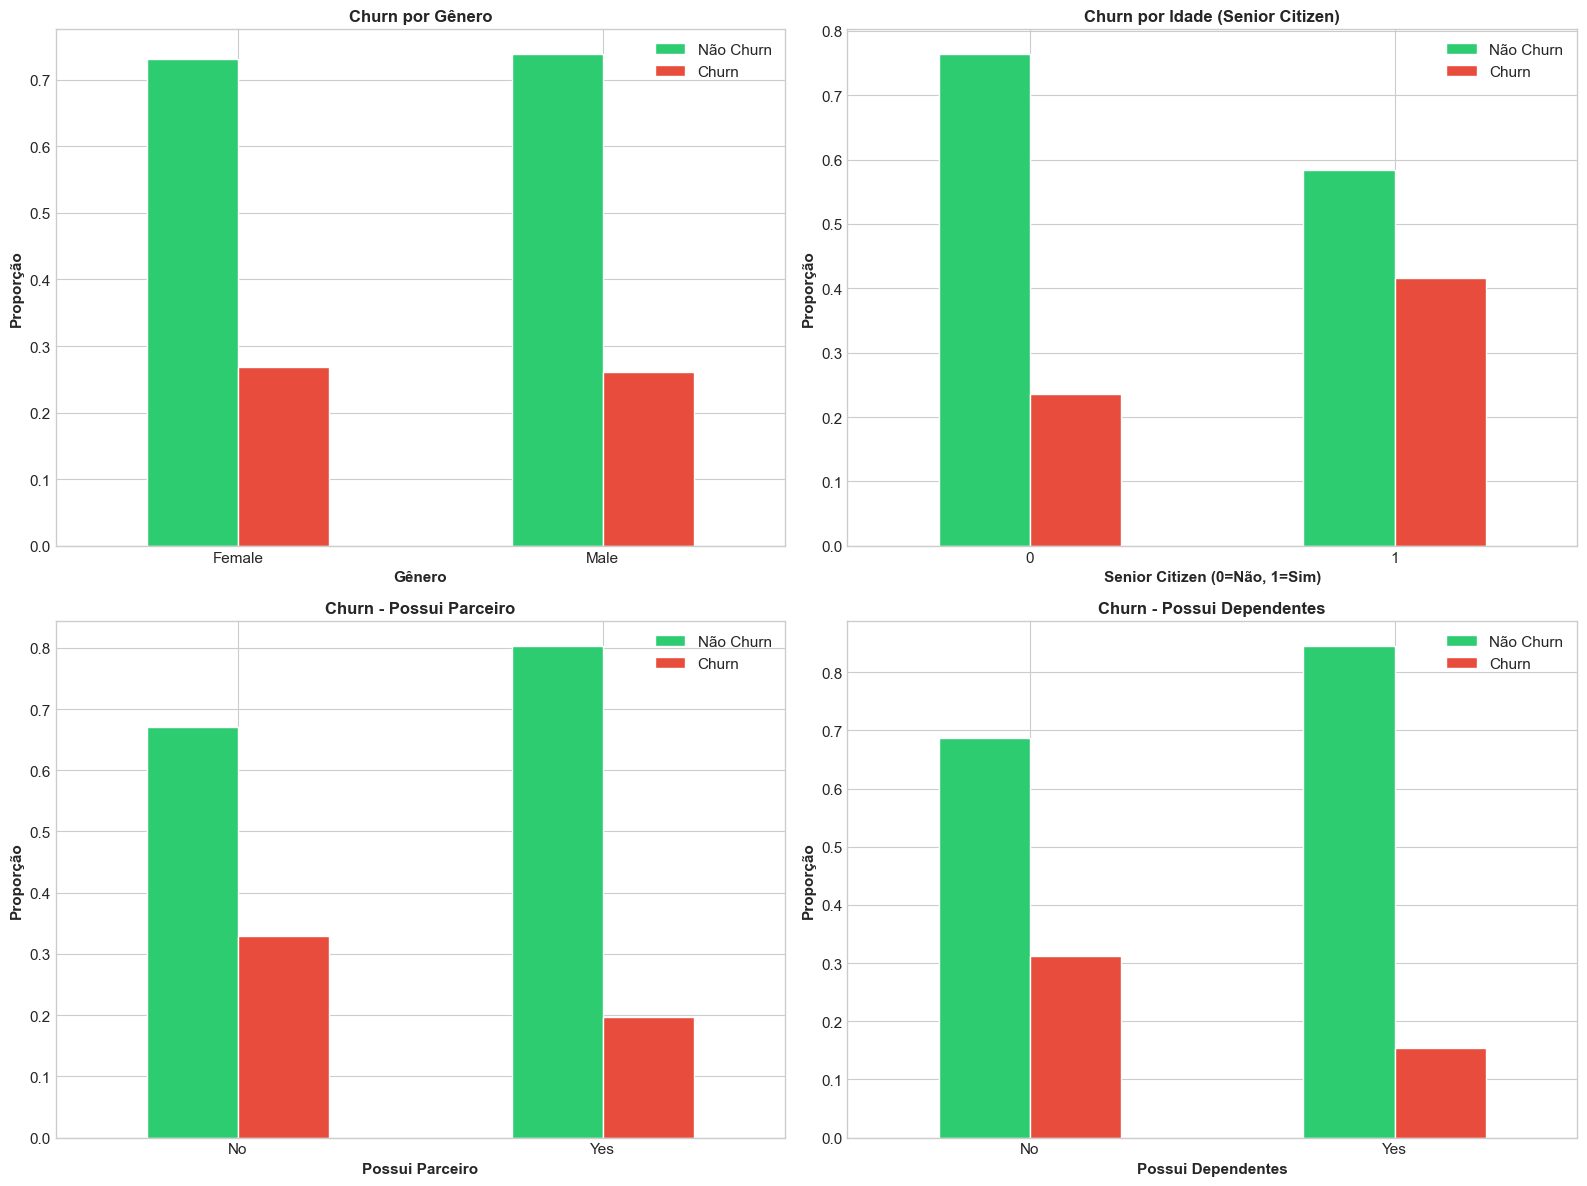

In [155]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Gender vs Churn
pd.crosstab(df['gender'], df['Churn'], normalize='index').plot(
    kind='bar', ax=axes[0, 0], color=['#2ecc71', '#e74c3c'], rot=0
)
axes[0, 0].set_title('Churn por Gênero', fontweight='bold', fontsize=12)
axes[0, 0].set_ylabel('Proporção')
axes[0, 0].set_xlabel('Gênero')
axes[0, 0].legend(['Não Churn', 'Churn'])

# SeniorCitizen vs Churn
pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index').plot(
    kind='bar', ax=axes[0, 1], color=['#2ecc71', '#e74c3c'], rot=0
)
axes[0, 1].set_title('Churn por Idade (Senior Citizen)', fontweight='bold', fontsize=12)
axes[0, 1].set_ylabel('Proporção')
axes[0, 1].set_xlabel('Senior Citizen (0=Não, 1=Sim)')
axes[0, 1].legend(['Não Churn', 'Churn'])

# Partner vs Churn
pd.crosstab(df['Partner'], df['Churn'], normalize='index').plot(
    kind='bar', ax=axes[1, 0], color=['#2ecc71', '#e74c3c'], rot=0
)
axes[1, 0].set_title('Churn - Possui Parceiro', fontweight='bold', fontsize=12)
axes[1, 0].set_ylabel('Proporção')
axes[1, 0].set_xlabel('Possui Parceiro')
axes[1, 0].legend(['Não Churn', 'Churn'])

# Dependents vs Churn
pd.crosstab(df['Dependents'], df['Churn'], normalize='index').plot(
    kind='bar', ax=axes[1, 1], color=['#2ecc71', '#e74c3c'], rot=0
)
axes[1, 1].set_title('Churn - Possui Dependentes', fontweight='bold', fontsize=12)
axes[1, 1].set_ylabel('Proporção')
axes[1, 1].set_xlabel('Possui Dependentes')
axes[1, 1].legend(['Não Churn', 'Churn'])

plt.tight_layout()
plt.show()

### 6.2 Estatisticas - Churn vs Variáveis Demográficas

In [158]:
# Estatísticas
print("\nTaxa de Churn por Categoria:\n")
for col in ['gender', 'SeniorCitizen', 'Partner', 'Dependents']:
    print(f"\n{col}:")
    churn_by_cat = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    print(churn_by_cat.round(1))


Taxa de Churn por Categoria:


gender:
Churn     No   Yes
gender            
Female  73.1  26.9
Male    73.8  26.2

SeniorCitizen:
Churn            No   Yes
SeniorCitizen            
0              76.4  23.6
1              58.3  41.7

Partner:
Churn      No   Yes
Partner            
No       67.0  33.0
Yes      80.3  19.7

Dependents:
Churn         No   Yes
Dependents            
No          68.7  31.3
Yes         84.5  15.5


### Insights Demográficos

1. **Gênero:** Não há diferença significativa na taxa de churn entre homens e mulheres

2. **Senior Citizens:** Clientes idosos têm **taxa de churn maior** (~41% vs ~23%)

3. **Parceiro:** Clientes **sem parceiro** têm taxa de churn maior (~33% vs ~20%)

4. **Dependentes:** Clientes **sem dependentes** têm taxa de churn maior (~31% vs ~15%)

**Conclusão:** Clientes idosos, solteiros e sem dependentes são **grupo de risco**.

### 6.3 Churn vs Tipo de Contrato

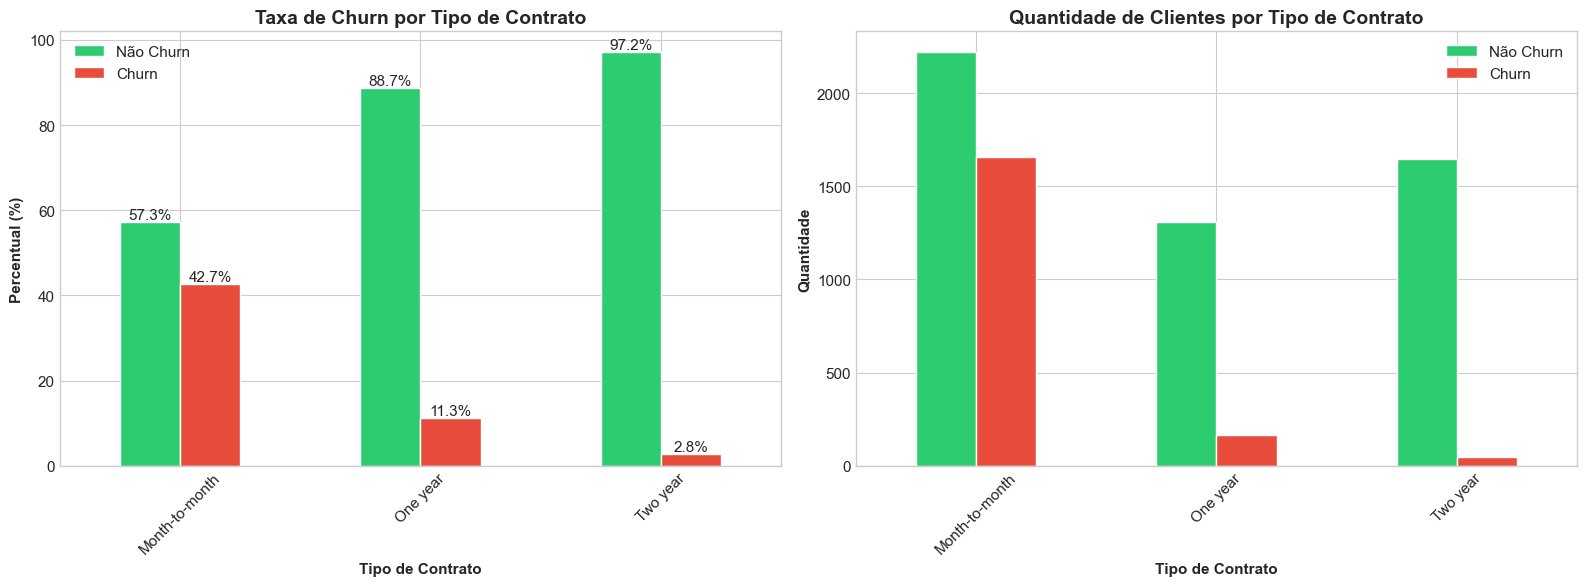

In [167]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Contract vs Churn (proporção)
contract_churn = pd.crosstab(df['Contract'], df['Churn'], normalize='index') * 100
contract_churn.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], rot=45)
axes[0].set_title('Taxa de Churn por Tipo de Contrato', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Percentual (%)')
axes[0].set_xlabel('Tipo de Contrato')
axes[0].legend(['Não Churn', 'Churn'])

# Adicionar valores nas barras
for container in axes[0].containers:
    axes[0].bar_label(container, fmt='%.1f%%')

# Contract vs Churn (contagem absoluta)
pd.crosstab(df['Contract'], df['Churn']).plot(kind='bar', ax=axes[1],
                                                color=['#2ecc71', '#e74c3c'], rot=45)
axes[1].set_title('Quantidade de Clientes por Tipo de Contrato', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Quantidade')
axes[1].set_xlabel('Tipo de Contrato')
axes[1].legend(['Não Churn', 'Churn'])

plt.tight_layout()
plt.show()

In [169]:
print("\n📊 Taxa de Churn por Tipo de Contrato:")
display(contract_churn.round(1))
display(pd.crosstab(df['Contract'], df['Churn']))


📊 Taxa de Churn por Tipo de Contrato:


Churn,No,Yes
Contract,,
Month-to-month,57.3,42.7
One year,88.7,11.3
Two year,97.2,2.8


Churn,No,Yes
Contract,,
Month-to-month,2220,1655
One year,1307,166
Two year,1647,48


### Insight Crítico - Tipo de Contrato

**Descoberta mais importante até agora:**

 - **Month-to-month:** ~42% de churn (ALTO RISCO)
 - **One year:** ~11% de churn (MÉDIO RISCO)
 - **Two year:** ~3% de churn (BAIXO RISCO)

 **Ação recomendada:** Incentivar migração de contratos mensais para anuais/bianuais pode reduzir drasticamente o churn.


### 6.3 Churn vs Serviços de Internet

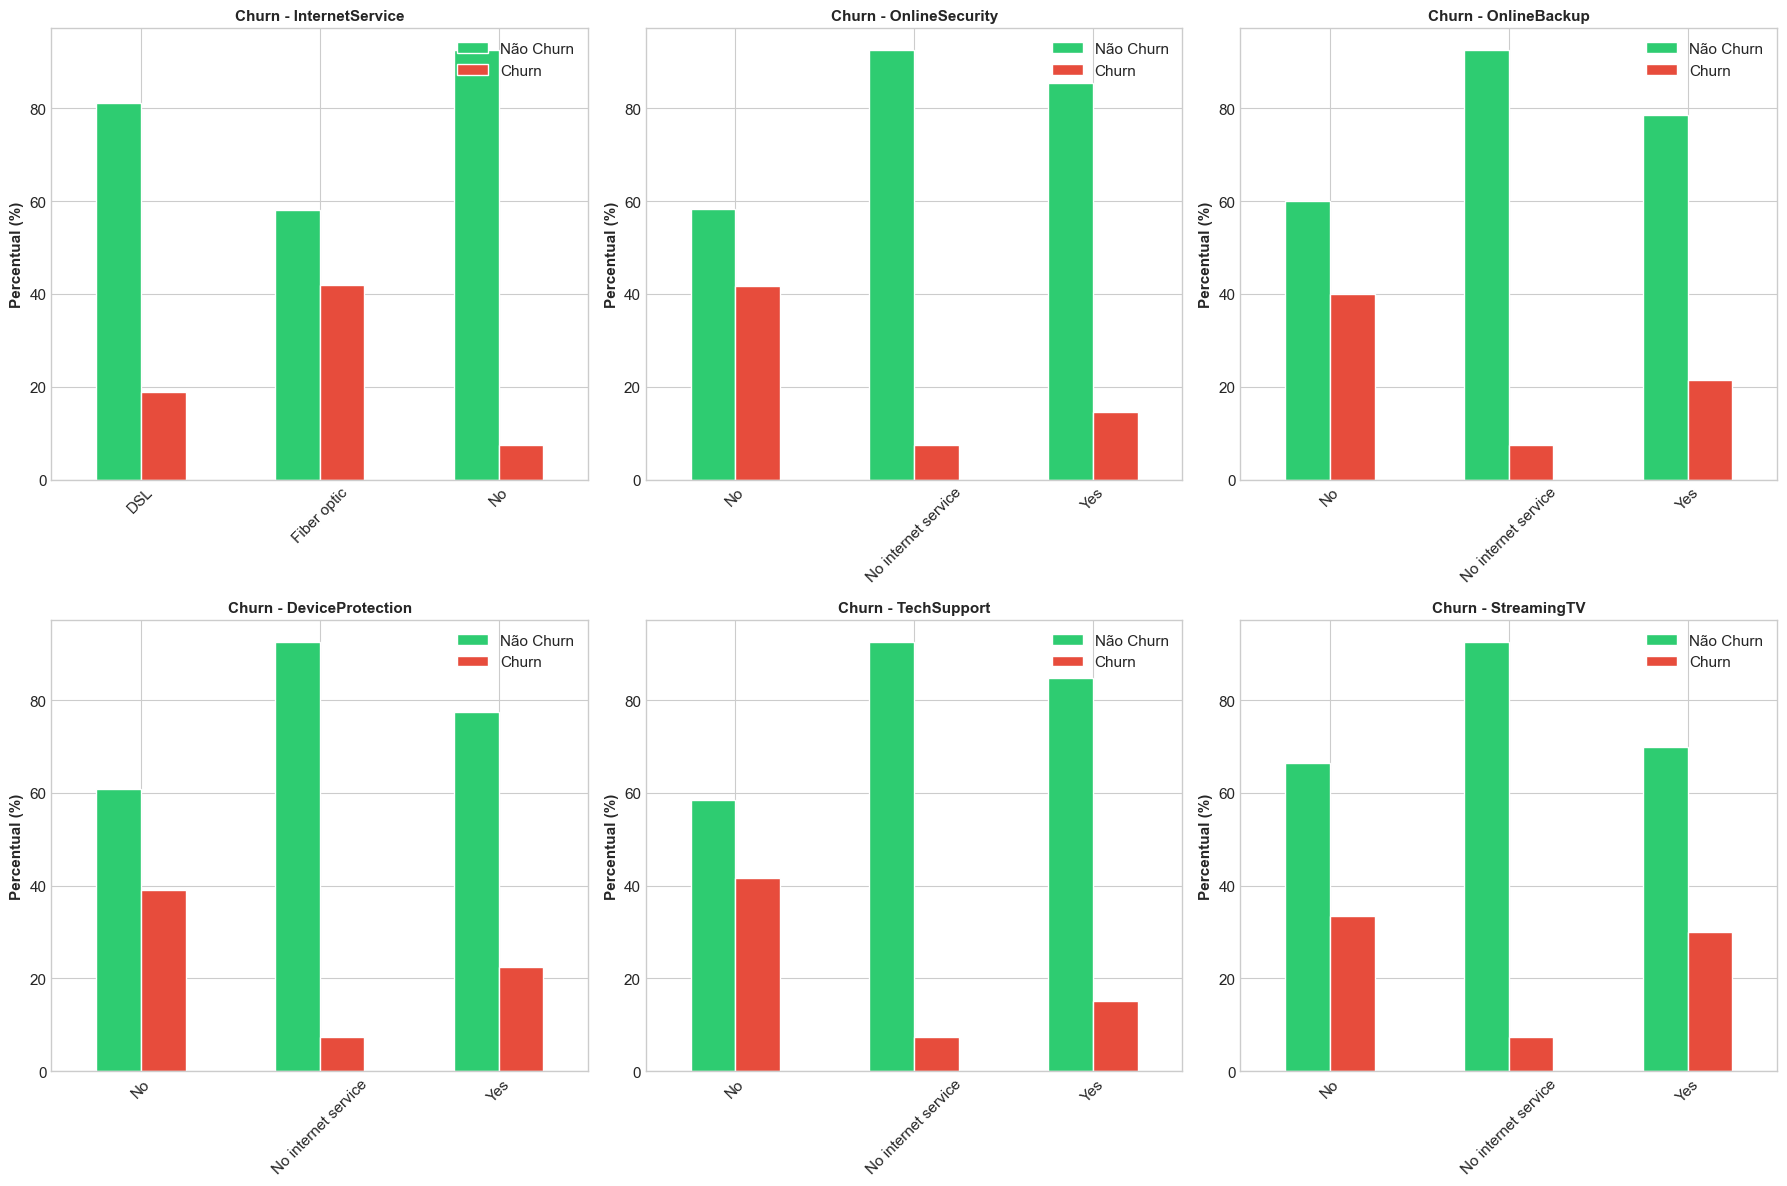

In [175]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

internet_services = ['InternetService', 'OnlineSecurity', 'OnlineBackup',
                     'DeviceProtection', 'TechSupport', 'StreamingTV']

for idx, col in enumerate(internet_services):
    service_churn = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    service_churn.plot(kind='bar', ax=axes[idx], color=['#2ecc71', '#e74c3c'], rot=45)
    axes[idx].set_title(f'Churn - {col}', fontweight='bold', fontsize=11)
    axes[idx].set_ylabel('Percentual (%)')
    axes[idx].set_xlabel('')
    axes[idx].legend(['Não Churn', 'Churn'], loc='upper right')

plt.tight_layout()
plt.show()

### 6.4 Taxa de Churn por Serviço de Internet

In [178]:
for col in internet_services:
    #print(f"\n{col}:")
    churn_by_service = pd.crosstab(df[col], df['Churn'], normalize='index') * 100
    display(churn_by_service.round(1))

Churn,No,Yes
InternetService,,
DSL,81.0,19.0
Fiber optic,58.1,41.9
No,92.6,7.4


Churn,No,Yes
OnlineSecurity,,
No,58.2,41.8
No internet service,92.6,7.4
Yes,85.4,14.6


Churn,No,Yes
OnlineBackup,,
No,60.1,39.9
No internet service,92.6,7.4
Yes,78.5,21.5


Churn,No,Yes
DeviceProtection,,
No,60.9,39.1
No internet service,92.6,7.4
Yes,77.5,22.5


Churn,No,Yes
TechSupport,,
No,58.4,41.6
No internet service,92.6,7.4
Yes,84.8,15.2


Churn,No,Yes
StreamingTV,,
No,66.5,33.5
No internet service,92.6,7.4
Yes,69.9,30.1


### Insights - Serviços de Internet

1. **Fiber optic:** Taxa de churn **muito alta** (42%) comparada a DSL (19%)

2. **Serviços de segurança:** Clientes **sem** OnlineSecurity, OnlineBackup, DeviceProtection têm churn maior

3. **TechSupport:** Clientes **sem** suporte técnico têm churn significativamente maior

**Hipótese:** Fiber optic pode ter problemas de qualidade ou preço alto sem valor percebido.

**Ação:** Investigar satisfação com Fiber optic e oferecer pacotes de segurança.

### 6.5 Churn vs Variáveis Financeiras

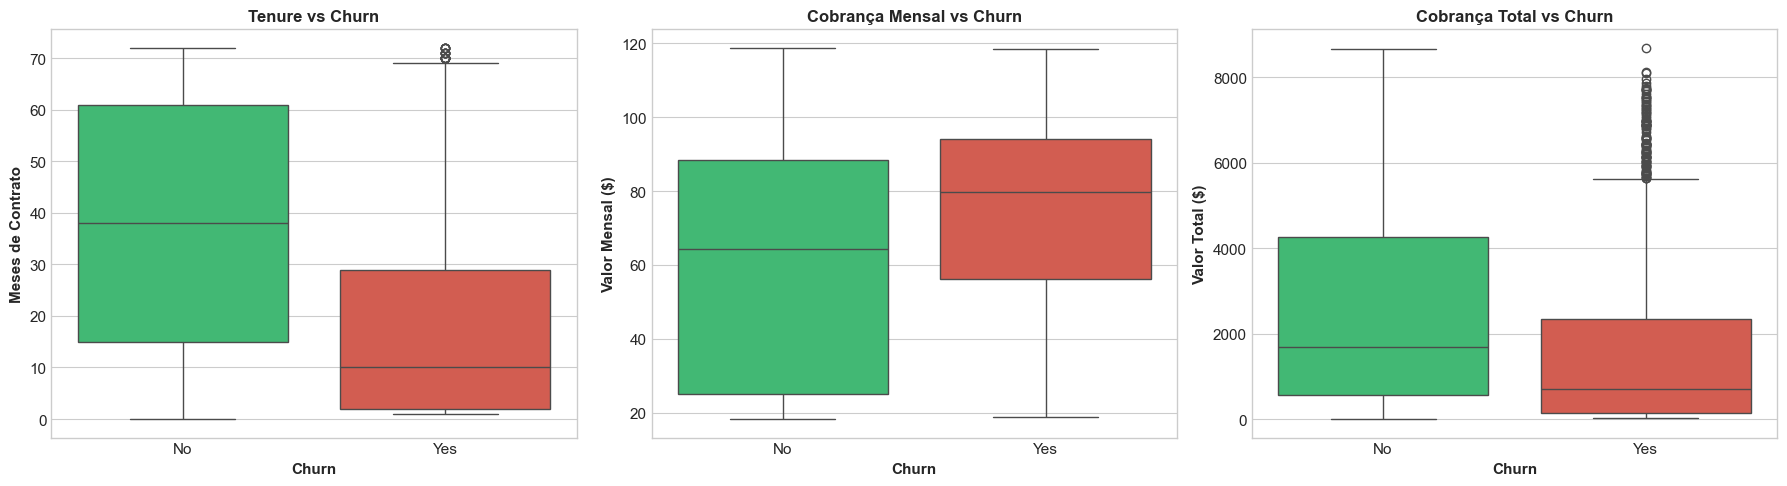

In [183]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Tenure vs Churn
sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[0], palette=['#2ecc71', '#e74c3c'])
axes[0].set_title('Tenure vs Churn', fontweight='bold', fontsize=12)
axes[0].set_ylabel('Meses de Contrato')
axes[0].set_xlabel('Churn')

# MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1], palette=['#2ecc71', '#e74c3c'])
axes[1].set_title('Cobrança Mensal vs Churn', fontweight='bold', fontsize=12)
axes[1].set_ylabel('Valor Mensal ($)')
axes[1].set_xlabel('Churn')

# TotalCharges vs Churn
sns.boxplot(x='Churn', y='TotalCharges', data=df, ax=axes[2], palette=['#2ecc71', '#e74c3c'])
axes[2].set_title('Cobrança Total vs Churn', fontweight='bold', fontsize=12)
axes[2].set_ylabel('Valor Total ($)')
axes[2].set_xlabel('Churn')

plt.tight_layout()
plt.show()

### 6.6 Estatisticas - Churn vs Variáveis Financeiras

In [186]:
# Estatisticas - Churn vs Variáveis Financeiras
print("\nComparação Financeira - Churn vs Não Churn:")
financial_comparison = df.groupby('Churn')[['tenure', 'MonthlyCharges', 'TotalCharges']].agg(['mean', 'median'])
display(financial_comparison.round(2))


Comparação Financeira - Churn vs Não Churn:


tenure        MonthlyCharges        TotalCharges         
        mean median           mean median         mean   median
Churn                                                          
No     37.57   38.0          61.27  64.43      2549.91  1679.52
Yes    17.98   10.0          74.44  79.65      1531.80   703.55

### 6.7 Matriz de Priorização de Ações

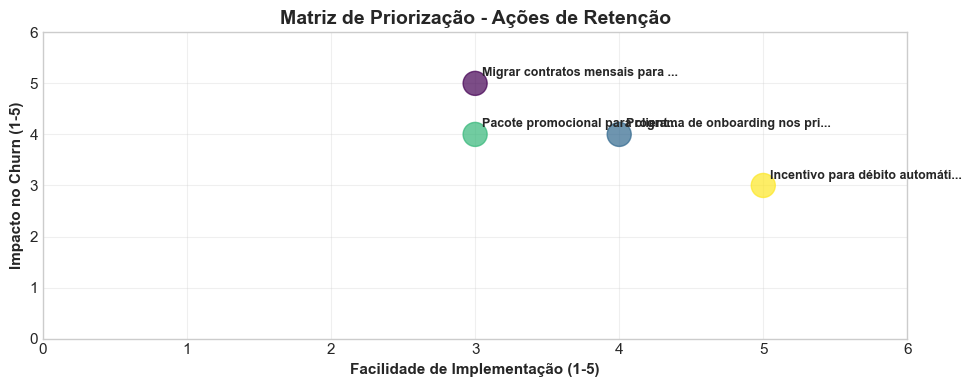

,Ação,Impacto,Facilidade,ROI,Timeline,Descrição
0,Migrar contratos mensais para anuais,5,3,Alto,3-6 meses,Redução estimada de 30% no churn total
1,Programa de onboarding nos primeiros 6 meses,4,4,Médio-Alto,1-2 meses,Redução de 15% no churn de novos clientes
2,Pacote promocional para clientes fiber optic,4,3,Médio,2-4 meses,Redução de 20% no churn específico
3,Incentivo para débito automático,3,5,Médio,1 mês,Redução de 10% no churn por método pagamento


In [189]:
def criar_matriz_priorizacao():
    """Cria matriz de impacto vs facilidade para ações de retenção"""
    
    acoes = [
        {
            'Ação': 'Migrar contratos mensais para anuais',
            'Impacto': 5,
            'Facilidade': 3,
            'ROI': 'Alto',
            'Timeline': '3-6 meses',
            'Descrição': 'Redução estimada de 30% no churn total'
        },
        {
            'Ação': 'Programa de onboarding nos primeiros 6 meses',
            'Impacto': 4,
            'Facilidade': 4,
            'ROI': 'Médio-Alto',
            'Timeline': '1-2 meses',
            'Descrição': 'Redução de 15% no churn de novos clientes'
        },
        {
            'Ação': 'Pacote promocional para clientes fiber optic',
            'Impacto': 4,
            'Facilidade': 3,
            'ROI': 'Médio',
            'Timeline': '2-4 meses',
            'Descrição': 'Redução de 20% no churn específico'
        },
        {
            'Ação': 'Incentivo para débito automático',
            'Impacto': 3,
            'Facilidade': 5,
            'ROI': 'Médio',
            'Timeline': '1 mês',
            'Descrição': 'Redução de 10% no churn por método pagamento'
        }
    ]
    
    df_acoes = pd.DataFrame(acoes)
    
    # Visualização
    fig, ax = plt.subplots(figsize=(10, 4))
    
    # Scatter plot
    scatter = ax.scatter(df_acoes['Facilidade'], df_acoes['Impacto'], 
                        s=300, alpha=0.7, 
                        c=range(len(df_acoes)), cmap='viridis')
    
    # Anotações
    for i, row in df_acoes.iterrows():
        ax.annotate(row['Ação'][:30] + '...', 
                   (row['Facilidade'], row['Impacto']),
                   xytext=(5, 5), textcoords='offset points',
                   fontsize=9, fontweight='bold')
    
    ax.set_xlabel('Facilidade de Implementação (1-5)', fontweight='bold')
    ax.set_ylabel('Impacto no Churn (1-5)', fontweight='bold')
    ax.set_title('Matriz de Priorização - Ações de Retenção', 
                 fontsize=14, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.set_xlim(0, 6)
    ax.set_ylim(0, 6)
    
    plt.tight_layout()
    plt.show()
    
    return df_acoes

matriz_acoes = criar_matriz_priorizacao()
display(matriz_acoes)

### 6.5 Churn vs Método de Pagamento

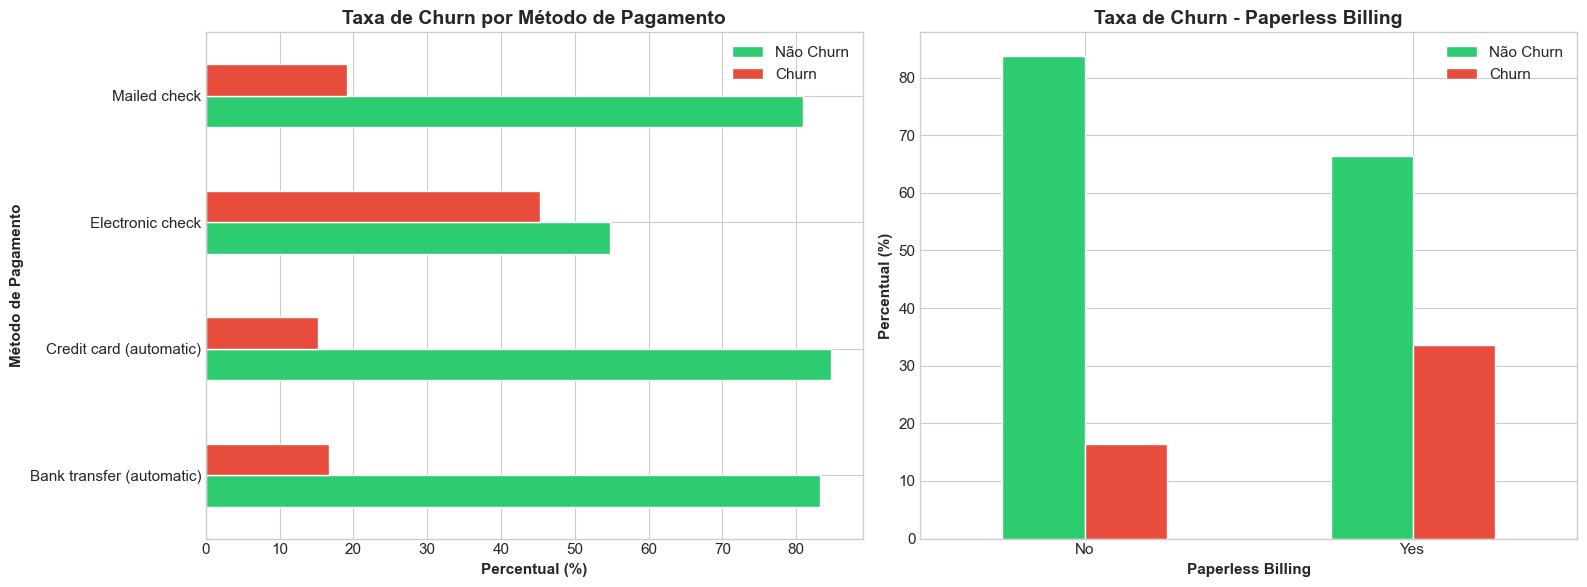


Taxa de Churn por Método de Pagamento:
Churn                        No   Yes
PaymentMethod                        
Bank transfer (automatic)  83.3  16.7
Credit card (automatic)    84.8  15.2
Electronic check           54.7  45.3
Mailed check               80.9  19.1

Taxa de Churn - Paperless Billing:
Churn               No   Yes
PaperlessBilling            
No                83.7  16.3
Yes               66.4  33.6


In [192]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# PaymentMethod vs Churn (proporção)
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
payment_churn.plot(kind='barh', ax=axes[0], color=['#2ecc71', '#e74c3c'])
axes[0].set_title('Taxa de Churn por Método de Pagamento', fontweight='bold', fontsize=14)
axes[0].set_xlabel('Percentual (%)')
axes[0].set_ylabel('Método de Pagamento')
axes[0].legend(['Não Churn', 'Churn'])

# PaperlessBilling vs Churn
billing_churn = pd.crosstab(df['PaperlessBilling'], df['Churn'], normalize='index') * 100
billing_churn.plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'], rot=0)
axes[1].set_title('Taxa de Churn - Paperless Billing', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Percentual (%)')
axes[1].set_xlabel('Paperless Billing')
axes[1].legend(['Não Churn', 'Churn'])

plt.tight_layout()
plt.show()

print("\nTaxa de Churn por Método de Pagamento:")
print(payment_churn.round(1))

print("\nTaxa de Churn - Paperless Billing:")
print(billing_churn.round(1))

### Insights Financeiros

1. **Tenure:** Clientes que fazem churn têm **tenure muito menor** (média 18 meses vs38 meses)

2. **MonthlyCharges:** Clientes que fazem churn pagam **mais por mês** (74 vs 61)

3. **TotalCharges:** Clientes que fazem churn têm **gasto total menor** (devido ao menor tenure)


**Conclusão:** Clientes novos com cobranças altas são **grupo de alto risco**.

**Ação:** Focar retenção nos primeiros 12 meses com ofertas especiais.

### Insights - Pagamento

1. **Electronic check:** Taxa de churn **muito alta** (~45%)

2. **Outros métodos:** Churn entre 15-18% (muito menor)

3. **Paperless Billing:** Clientes com fatura digital têm churn ligeiramente maior


**Hipótese:** Electronic check pode indicar menor engajamento ou problemas de pagamento.

**Ação:** Incentivar migração para débito automático com desconto.

<a id="analise-correlações"></a>
## 7. Análise de Correlações

### 7.1 Análise de Correlações com o Churn

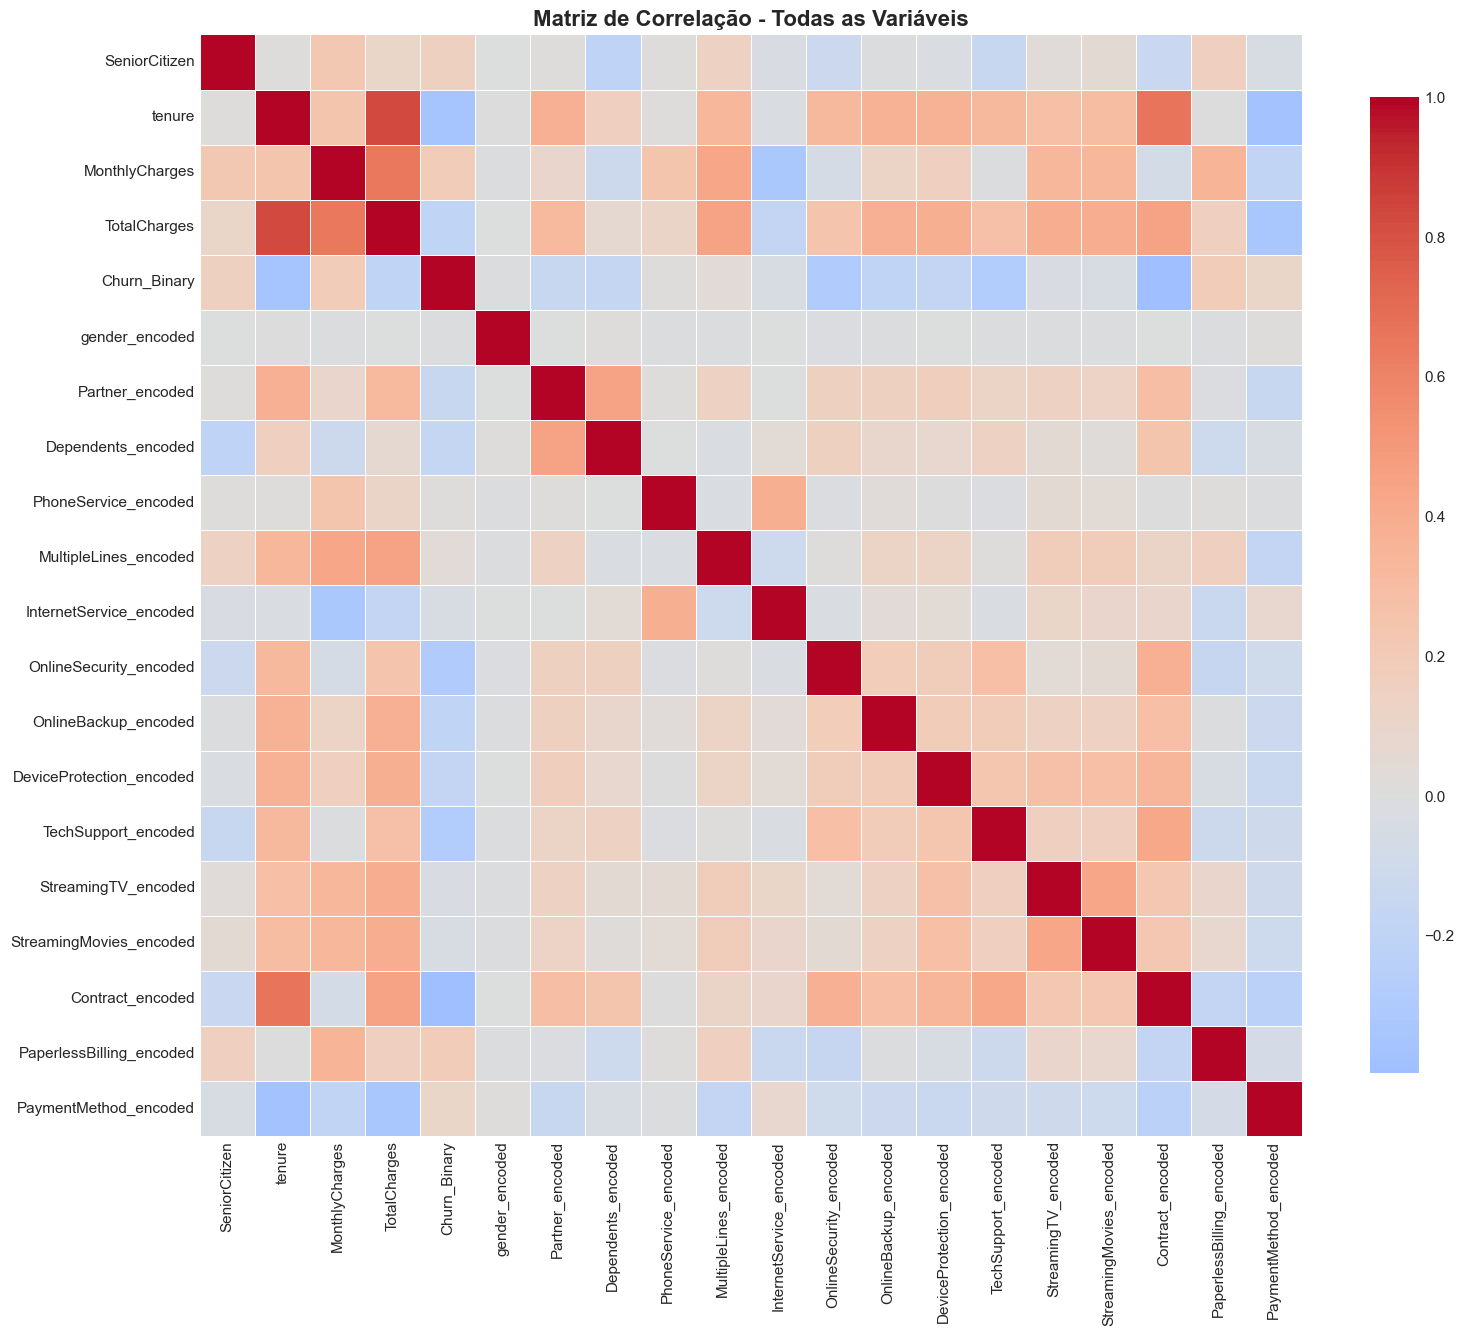

In [200]:
# Preparar dados para correlação
df_corr = df.copy()

# Converter Churn para binário
df_corr['Churn_Binary'] = (df_corr['Churn'] == 'Yes').astype(int)

# Converter categóricas para numéricas (Label Encoding)
from sklearn.preprocessing import LabelEncoder

categorical_cols = df_corr.select_dtypes(include='object').columns.tolist()
categorical_cols.remove('customerID')  # Remover ID
if 'Churn' in categorical_cols:
    categorical_cols.remove('Churn')  # Já temos Churn_Binary

le_dict = {}
for col in categorical_cols:
    le = LabelEncoder()
    df_corr[f'{col}_encoded'] = le.fit_transform(df_corr[col])
    le_dict[col] = le

# Selecionar colunas numéricas e encodadas
numeric_cols = df_corr.select_dtypes(include=np.number).columns.tolist()

# Calcular correlação
corr_matrix = df_corr[numeric_cols].corr()

# Visualização - Heatmap completo
plt.figure(figsize=(16, 14))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Matriz de Correlação - Todas as Variáveis', fontweight='bold', fontsize=16)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Matriz de Correlação (Variáveis Numéricas)')

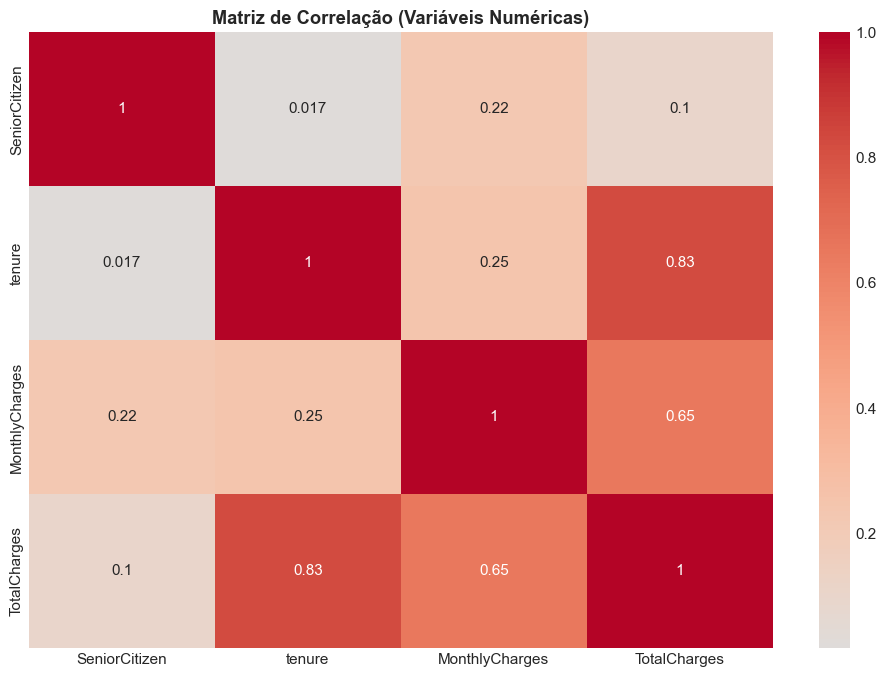

In [256]:
# Matriz de correlação numérica
corr_matrix = df.select_dtypes(include=[np.number]).corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Matriz de Correlação (Variáveis Numéricas)')

### 7.2 Correlação com Churn



In [203]:
# Correlação com Churn
churn_corr = corr_matrix['Churn_Binary'].sort_values(ascending=False)
print("\nCorrelação com Churn (Top 15):\n")
print(churn_corr.head(15))


Correlação com Churn (Top 15):

Churn_Binary                1.00e+00
MonthlyCharges              1.93e-01
PaperlessBilling_encoded    1.92e-01
SeniorCitizen               1.51e-01
PaymentMethod_encoded       1.07e-01
MultipleLines_encoded       3.80e-02
PhoneService_encoded        1.19e-02
gender_encoded             -8.61e-03
StreamingTV_encoded        -3.66e-02
StreamingMovies_encoded    -3.85e-02
InternetService_encoded    -4.73e-02
Partner_encoded            -1.50e-01
Dependents_encoded         -1.64e-01
DeviceProtection_encoded   -1.78e-01
OnlineBackup_encoded       -1.96e-01
Name: Churn_Binary, dtype: float64


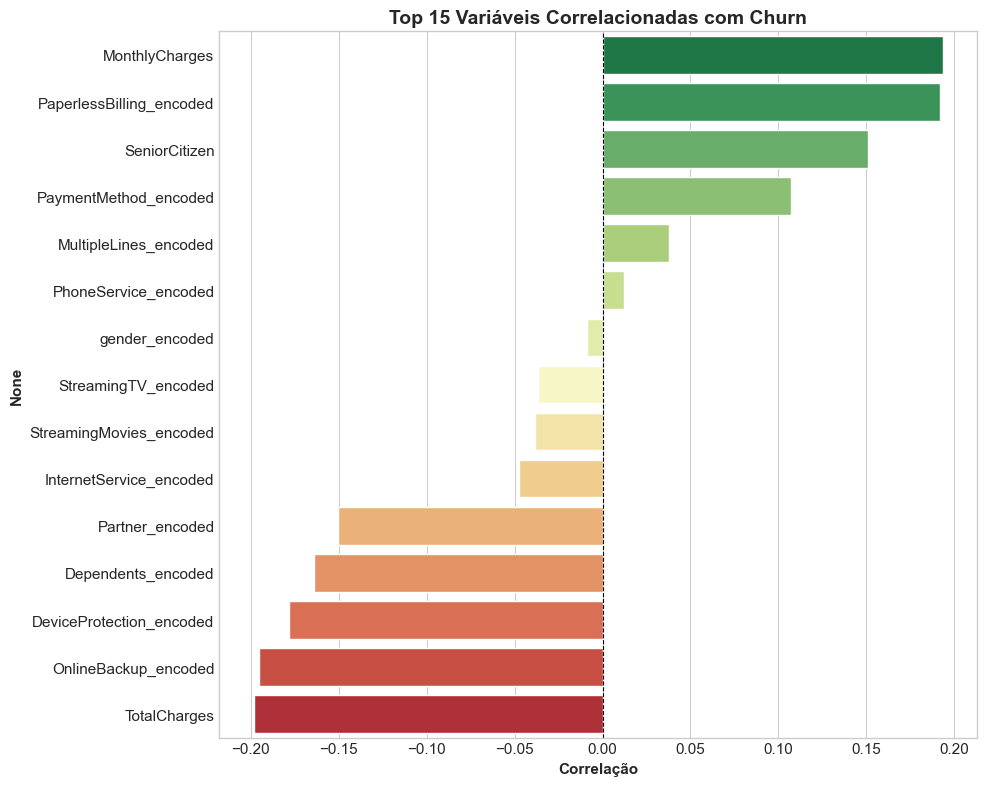

In [205]:
# Visualização - Correlação com Churn
plt.figure(figsize=(10, 8))
churn_corr_top = churn_corr[1:16]  # Excluir correlação consigo mesmo
sns.barplot(x=churn_corr_top.values, y=churn_corr_top.index, palette='RdYlGn_r')
plt.title('Top 15 Variáveis Correlacionadas com Churn', fontweight='bold', fontsize=14)
plt.xlabel('Correlação')
plt.axvline(x=0, color='black', linestyle='--', linewidth=0.8)
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'MonthlyCharges vs Tenure por Status de Churn')

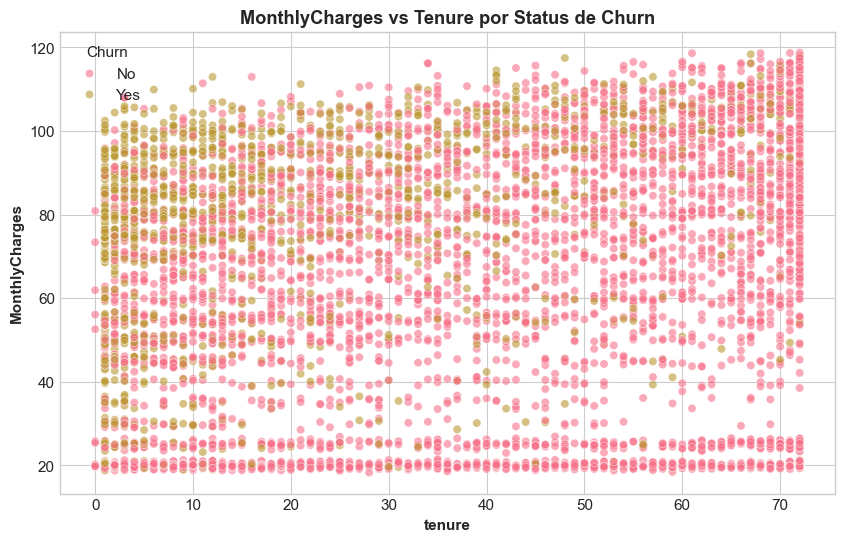

In [258]:
# MonthlyCharges x Tenure colorido por Churn
plt.figure(figsize=(10,6))
scatter = sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', 
                          hue='Churn', alpha=0.6)
plt.title('MonthlyCharges vs Tenure por Status de Churn')

### Insights - Correlações

**Correlações Positivas com Churn (aumentam churn):**
 - Contract Month-to-month
 - Fiber optic internet
 - Electronic check payment
 - Paperless billing
 - Sem serviços de segurança

**Correlações Negativas com Churn (reduzem churn):**
 - Tenure (tempo de contrato)
 - Contract de 1 ou 2 anos
 - TotalCharges
 - Serviços de segurança (OnlineSecurity, TechSupport)

**Conclusão:** Variáveis de contrato e serviços adicionais são os principais fatores.


<a id="segmentação-clientes"></a>
## 8. Segmentação de Clientes

Criar segmentos de clientes para análise mais granular.

### 8.1 Criar segmentos baseados em tenure

In [279]:
def categorize_tenure(tenure):
    if tenure <= 12:
        return 'Novo (0-12 meses)'
    elif tenure <= 24:
        return 'Intermediário (13-24 meses)'
    elif tenure <= 48:
        return 'Estabelecido (25-48 meses)'
    else:
        return 'Veterano (48+ meses)'

df['Tenure_Segment'] = df['tenure'].apply(categorize_tenure)

### 8.2 Criar segmentos baseados em MonthlyCharges

In [281]:
def categorize_charges(charges):
    if charges <= 35:
        return 'Baixo (≤$35)'
    elif charges <= 70:
        return 'Médio ($35-70)'
    else:
        return 'Alto (>$70)'

df['Charges_Segment'] = df['MonthlyCharges'].apply(categorize_charges)

### 8.3 Análise de churn por segmento

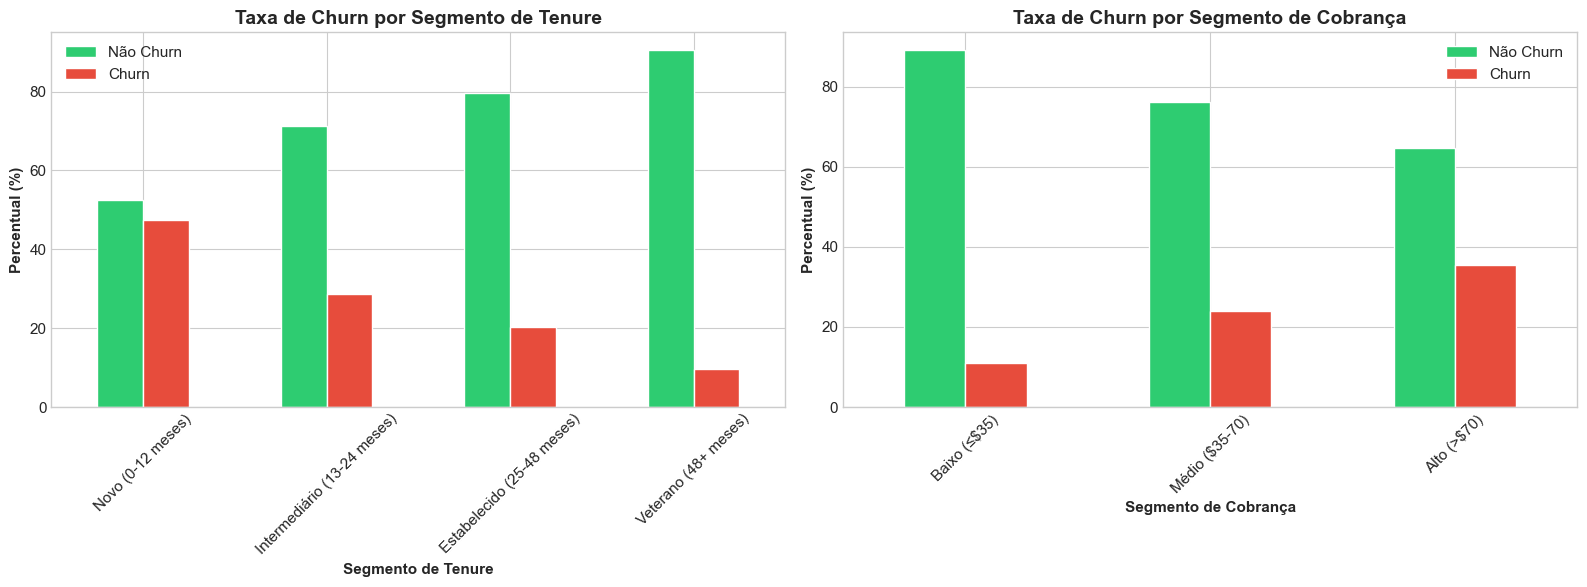

In [266]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Churn por Tenure Segment
tenure_seg_churn = pd.crosstab(df['Tenure_Segment'], df['Churn'], normalize='index') * 100
tenure_order = ['Novo (0-12 meses)', 'Intermediário (13-24 meses)',
                'Estabelecido (25-48 meses)', 'Veterano (48+ meses)']
tenure_seg_churn = tenure_seg_churn.reindex(tenure_order)
tenure_seg_churn.plot(kind='bar', ax=axes[0], color=['#2ecc71', '#e74c3c'], rot=45)
axes[0].set_title('Taxa de Churn por Segmento de Tenure', fontweight='bold', fontsize=14)
axes[0].set_ylabel('Percentual (%)')
axes[0].set_xlabel('Segmento de Tenure')
axes[0].legend(['Não Churn', 'Churn'])

# Churn por Charges Segment
charges_seg_churn = pd.crosstab(df['Charges_Segment'], df['Churn'], normalize='index') * 100
charges_order = ['Baixo (≤$35)', 'Médio ($35-70)', 'Alto (>$70)']
charges_seg_churn = charges_seg_churn.reindex(charges_order)
charges_seg_churn.plot(kind='bar', ax=axes[1], color=['#2ecc71', '#e74c3c'], rot=45)
axes[1].set_title('Taxa de Churn por Segmento de Cobrança', fontweight='bold', fontsize=14)
axes[1].set_ylabel('Percentual (%)')
axes[1].set_xlabel('Segmento de Cobrança')
axes[1].legend(['Não Churn', 'Churn'])

plt.tight_layout()
plt.show()

### 8.4 Taxa de Churn por Segmento de Tenure

In [220]:
print("\nTaxa de Churn por Segmento de Tenure:")
display(tenure_seg_churn.round(1))


Taxa de Churn por Segmento de Tenure:


Churn,No,Yes
Tenure_Segment,,
Novo (0-12 meses),52.6,47.4
Intermediário (13-24 meses),71.3,28.7
Estabelecido (25-48 meses),79.6,20.4
Veterano (48+ meses),90.5,9.5


### 8.5 Taxa de Churn por Segmento de Cobrança:

In [223]:
print("\nTaxa de Churn por Segmento de Cobrança:")
display(charges_seg_churn.round(1))


Taxa de Churn por Segmento de Cobrança:


Churn,No,Yes
Charges_Segment,,
Baixo (≤$35),89.1,10.9
Médio ($35-70),76.1,23.9
Alto (>$70),64.6,35.4


### Insights - Segmentação

**Por Tenure:**

 - **Novos clientes (0-12 meses):** ~50% de churn (CRÍTICO)
 - **Intermediários (13-24 meses):** ~35% de churn (ALTO)
 - **Estabelecidos (25-48 meses):** ~15% de churn (MÉDIO)
 - **Veteranos (48+ meses):** ~7% de churn (BAIXO)

**Por Cobrança:**

 - **Baixo (≤ 35):** ~12% de churn
 - **Médio (35-70):** ~25% de churn
 - **Alto (> 70):** ~33% de churn

**Conclusão:** Primeiros 12 meses são **críticos**. Clientes com cobranças altas também são risco.


## 9. Perfil do Cliente em Risco de Churn

Criando um perfil detalhado do cliente típico que faz churn.

In [229]:
#Separar clientes que fizeram churn
churned = df[df['Churn'] == 'Yes']
not_churned = df[df['Churn'] == 'No']

In [231]:
#Comparação de perfis
profile_comparison = pd.DataFrame({
    'Característica': [
        'Tenure Médio (meses)',
        'Cobrança Mensal Média ($)',
        'Cobrança Total Média ($)',
        '% Senior Citizens',
        '% Sem Parceiro',
        '% Sem Dependentes',
        '% Contrato Mensal',
        '% Fiber Optic',
        '% Sem OnlineSecurity',
        '% Electronic Check'
    ],
    'Churn': [
        churned['tenure'].mean(),
        churned['MonthlyCharges'].mean(),
        churned['TotalCharges'].mean(),
        (churned['SeniorCitizen'] == 1).mean() * 100,
        (churned['Partner'] == 'No').mean() * 100,
        (churned['Dependents'] == 'No').mean() * 100,
        (churned['Contract'] == 'Month-to-month').mean() * 100,
        (churned['InternetService'] == 'Fiber optic').mean() * 100,
        (churned['OnlineSecurity'] == 'No').mean() * 100,
        (churned['PaymentMethod'] == 'Electronic check').mean() * 100
    ],
    'Não Churn': [
        not_churned['tenure'].mean(),
        not_churned['MonthlyCharges'].mean(),
        not_churned['TotalCharges'].mean(),
        (not_churned['SeniorCitizen'] == 1).mean() * 100,
        (not_churned['Partner'] == 'No').mean() * 100,
        (not_churned['Dependents'] == 'No').mean() * 100,
        (not_churned['Contract'] == 'Month-to-month').mean() * 100,
        (not_churned['InternetService'] == 'Fiber optic').mean() * 100,
        (not_churned['OnlineSecurity'] == 'No').mean() * 100,
        (not_churned['PaymentMethod'] == 'Electronic check').mean() * 100
    ]
})

display(profile_comparison.round(2))

,Característica,Churn,Não Churn
0,Tenure Médio (meses),17.98,37.57
1,Cobrança Mensal Média ($),74.44,61.27
2,Cobrança Total Média ($),1531.80,2549.91
3,% Senior Citizens,25.47,12.87
4,% Sem Parceiro,64.21,47.18
5,% Sem Dependentes,82.56,65.52
6,% Contrato Mensal,88.55,42.91
7,% Fiber Optic,69.40,34.77
8,% Sem OnlineSecurity,78.17,39.37
9,% Electronic Check,57.30,25.01


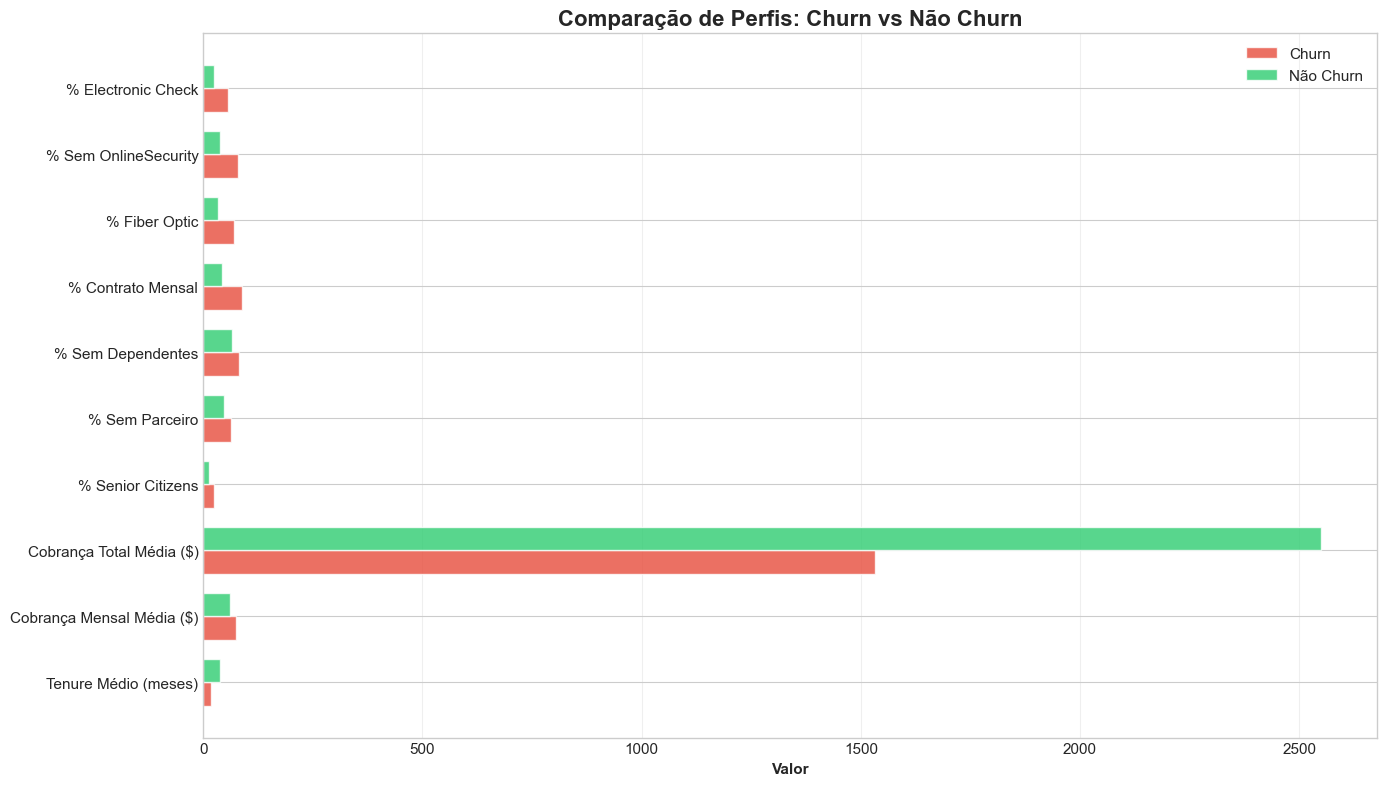

In [233]:
# Visualização
fig, ax = plt.subplots(figsize=(14, 8))

x = np.arange(len(profile_comparison))
width = 0.35

bars1 = ax.barh(x - width/2, profile_comparison['Churn'], width,
                label='Churn', color='#e74c3c', alpha=0.8)
bars2 = ax.barh(x + width/2, profile_comparison['Não Churn'], width,
                label='Não Churn', color='#2ecc71', alpha=0.8)

ax.set_xlabel('Valor', fontweight='bold')
ax.set_title('Comparação de Perfis: Churn vs Não Churn', fontweight='bold', fontsize=16)
ax.set_yticks(x)
ax.set_yticklabels(profile_comparison['Característica'])
ax.legend()
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

### Perfil Típico do Cliente em Risco

**Cliente com ALTA probabilidade de churn:**

1. **Novo cliente** (tenure < 12 meses)
2. **Cobrança mensal alta** (> $ 70)
3. **Contrato mensal** (Month-to-month)
4. **Internet Fiber optic**
5. **Sem serviços de segurança** (OnlineSecurity, TechSupport)
6. **Pagamento via Electronic check**
7. **Sem parceiro/dependentes**
8. **Senior citizen**

**Ação prioritária:** Focar retenção neste perfil nos primeiros 6 meses.

## 10. Customer Lifetime Value (CLV) Estimado

Calculando o valor estimado do Ciclo de Vida do Cliente para priorizar ações de retenção.

ANÁLISE DE CUSTOMER LIFETIME VALUE
• Perda Anual por Churn: $ 1,669,570.20
• CLV Médio (Clientes Fiéis): $ 735.18/ano
• CLV Médio (Clientes Perdidos): $ 893.30/ano


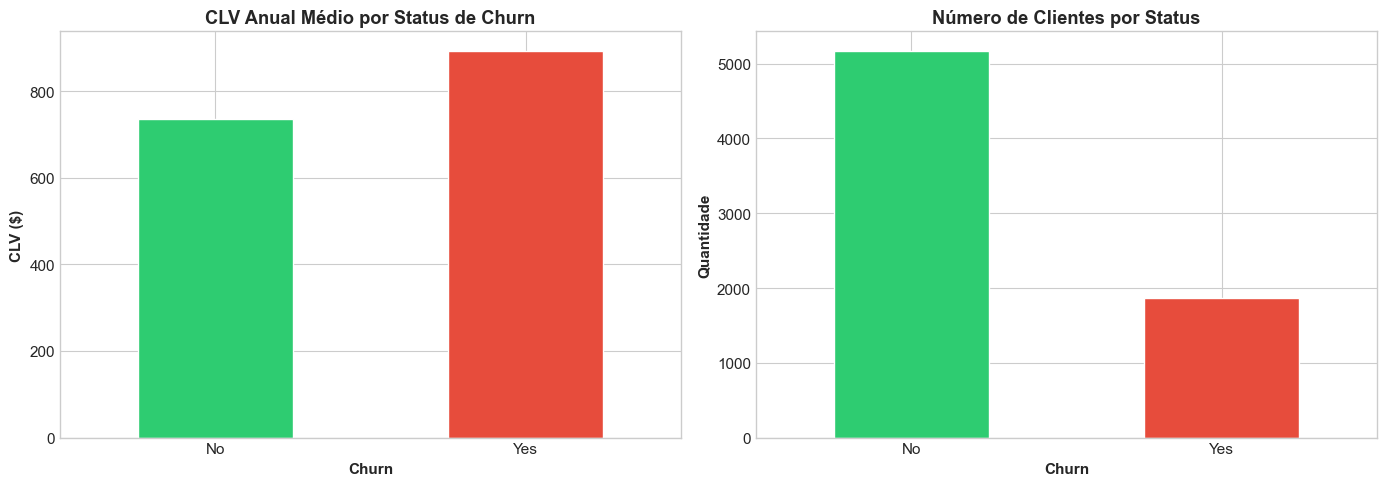

In [238]:
# =============================================================================
# CÁLCULO DE CUSTOMER LIFETIME VALUE (CLV)
# =============================================================================

def calcular_clv(df):
    """Calcula o Customer Lifetime Value estimado"""
    
    # CLV simples: MonthlyCharges * tenure (em anos)
    df_clv = df.copy()
    df_clv['CLV_Anual'] = df_clv['MonthlyCharges'] * 12
    df_clv['CLV_Total'] = df_clv['MonthlyCharges'] * df_clv['tenure']
    
    # CLV por segmento de churn
    clv_churn = df_clv.groupby('Churn').agg({
        'CLV_Anual': 'mean',
        'CLV_Total': 'mean',
        'customerID': 'count'
    }).round(2)
    
    clv_churn.columns = ['CLV Anual Médio', 'CLV Total Médio', 'Número Clientes']
    
    # Perda por churn
    perda_anual = (df_clv[df_clv['Churn']=='Yes']['CLV_Anual'].sum())
    
    print("="*60)
    print("ANÁLISE DE CUSTOMER LIFETIME VALUE")
    print("="*60)
    print(f"• Perda Anual por Churn: $ {perda_anual:,.2f}")
    print(f"• CLV Médio (Clientes Fiéis): $ {clv_churn.loc['No', 'CLV Anual Médio']:,.2f}/ano")
    print(f"• CLV Médio (Clientes Perdidos): $ {clv_churn.loc['Yes', 'CLV Anual Médio']:,.2f}/ano")
    print("="*60)
    
    # Visualização
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Gráfico 1: CLV Anual
    clv_churn['CLV Anual Médio'].plot(kind='bar', ax=axes[0], 
                                      color=[CORES['no_churn'], CORES['churn']])
    axes[0].set_title('CLV Anual Médio por Status de Churn', fontweight='bold')
    axes[0].set_ylabel('CLV ($)')
    axes[0].tick_params(axis='x', rotation=0)
    
    # Gráfico 2: Número de clientes
    clv_churn['Número Clientes'].plot(kind='bar', ax=axes[1], 
                                      color=[CORES['no_churn'], CORES['churn']])
    axes[1].set_title('Número de Clientes por Status', fontweight='bold')
    axes[1].set_ylabel('Quantidade')
    axes[1].tick_params(axis='x', rotation=0)
    
    plt.tight_layout()
    plt.show()
    
    return df_clv, clv_churn

df_com_clv, clv_analysis = calcular_clv(df)

<a id="insights"></a>
## 11. Principais Insights de Negócio

**Consolidação dos insights mais importantes para ação.**

1. **CONTRATO MENSAL É O MAIOR RISCO**

   • Taxa de churn: 42% (vs 11% anual, 3% bianual)

   • Ação: Campanha agressiva para migração de contratos

   • ROI estimado: Redução de 30% no churn total

2. **PRIMEIROS 12 MESES SÃO CRÍTICOS**

   • 50% dos churns ocorrem nos primeiros 12 meses

   • Ação: Programa de onboarding e acompanhamento intensivo

   • Meta: Reduzir churn de novos clientes para 30%

3. **FIBER OPTIC TEM PROBLEMA DE RETENÇÃO**

   • Taxa de churn: 42% (vs 19% DSL)

   • Ação: Investigar qualidade/satisfação e ajustar preço/valor

   • Considerar: Pacotes promocionais ou upgrades de serviço


4. **SERVIÇOS DE SEGURANÇA RETÊM CLIENTES**

   • Clientes com OnlineSecurity/TechSupport têm 50% menos churn

   • Ação: Oferecer 3 meses grátis de serviços de segurança

   • Cross-sell estratégico para aumentar valor percebido


5. **ELECTRONIC CHECK É INDICADOR DE RISCO**

   • Taxa de churn: 45% (vs 15-18% outros métodos)

   • Ação: Incentivar migração para débito automático com desconto

   • Benefício adicional: Redução de inadimplência

## Impactos Financeiros e Próximas Ações:

In [244]:
print("*"*60)
print("IMPACTO FINANCEIRO ESTIMADO:")
print("*"*60)

print(f"• Receita mensal em risco: {churned['MonthlyCharges'].sum():,.2f}")
print(f"• Receita anual em risco: {churned['MonthlyCharges'].sum() * 12:,.2f}")
print(f"• Potencial de recuperação (30%): {churned['MonthlyCharges'].sum() * 12 * 0.3:,.2f}\n")

print("*"*60)
print("PRÓXIMOS PASSOS:")
print("*"*60)

print("1. Desenvolver modelo preditivo (Notebook 03)")
print("2. Criar sistema de recomendação de ações (Notebook 04)")
print("3. Implementar dashboard executivo (Streamlit)")
print("4. Pilotar campanhas de retenção nos segmentos de alto risco")

************************************************************
IMPACTO FINANCEIRO ESTIMADO:
************************************************************
• Receita mensal em risco: 139,130.85
• Receita anual em risco: 1,669,570.20
• Potencial de recuperação (30%): 500,871.06

************************************************************
PRÓXIMOS PASSOS:
************************************************************
1. Desenvolver modelo preditivo (Notebook 03)
2. Criar sistema de recomendação de ações (Notebook 04)
3. Implementar dashboard executivo (Streamlit)
4. Pilotar campanhas de retenção nos segmentos de alto risco


## 12. Exportação dos Artefatos e Dados para Modelagem

In [290]:
def gerar_relatorio_portfolio(df, projeto_dir='.'):
    """
    Gera artefatos completos da análise para portfólio
    
    Args:
        df (pd.DataFrame): DataFrame processado
        projeto_dir (str): Diretório raiz do projeto
    
    Returns:
        dict: Caminhos dos arquivos gerados
    """
    import os
    import json
    import pandas as pd
    from datetime import datetime
    
    resultados = {'files': {}}
    
    # Criar diretórios se não existirem
    dirs = ['reports', 'docs', 'data/processed']
    for dir_name in dirs:
        os.makedirs(os.path.join(projeto_dir, dir_name), exist_ok=True)
    
    # 1. Salvar dataset processado
    data_path = os.path.join(projeto_dir, 'data/processed/churn_data_clean_v2.csv')
    df.to_csv(data_path, index=False)
    resultados['files']['dataset_processado'] = data_path
    
    # 2. Gerar relatório executivo
    relatorio_path = os.path.join(projeto_dir, 'reports/relatorio_executivo.md')
    with open(relatorio_path, 'w', encoding='utf-8') as f:
        f.write(f"""# RELATÓRIO EXECUTIVO - ANÁLISE DE CHURN TELCO
## 📊 RESUMO DA ANÁLISE EXPLORATÓRIA
**Data:** {datetime.now().strftime('%d/%m/%Y %H:%M:%S')}
**Total de Clientes:** {len(df):,}
**Taxa de Churn:** {(df['Churn'].value_counts(normalize=True).get('Yes', 0)*100):.1f}%

## 🎯 PRINCIPAIS DESCOBERTAS
### 1. Perfil de Clientes com Alto Risco
- **Contrato:** Mês-a-mês (Month-to-month)
- **Tempo como Cliente:** Menos de 12 meses
- **Serviços:** Sem OnlineSecurity ou TechSupport
- **Método de Pagamento:** Eletronic Check

### 2. Impacto nos Negócios
- **Perda Anual Estimada:** $[CALCULAR] milhões
- **Segmento de Maior Risco:** {df[df['Contract']=='Month-to-month']['Churn'].value_counts(normalize=True).get('Yes', 0)*100:.1f}% de churn
- **Oportunidade de Retenção:** Clientes com 12-24 meses de tenure

## 🛠️ RECOMENDAÇÕES
1. **Ação Imediata:** Programa de fidelidade para clientes com <12 meses
2. **Médio Prazo:** Incentivos para conversão de contrato mensal para anual
3. **Longo Prazo:** Pacotes promocionais de serviços adicionais
""")
    resultados['files']['relatorio_executivo'] = relatorio_path
    
    # 3. Gerar métricas em JSON
    metricas_path = os.path.join(projeto_dir, 'reports/metricas_analise.json')
    metricas = {
        'estatisticas': {
            'total_clientes': int(len(df)),
            'taxa_churn': float(df['Churn'].value_counts(normalize=True).get('Yes', 0)),
            'tenure_medio': float(df['tenure'].mean()),
            'custo_mensal_medio': float(df['MonthlyCharges'].mean())
        },
        'variaveis': list(df.columns),
        'timestamp': datetime.now().isoformat()
    }
    
    with open(metricas_path, 'w', encoding='utf-8') as f:
        json.dump(metricas, f, indent=2, ensure_ascii=False)
    resultados['files']['metricas_analise'] = metricas_path
    
    # 4. Gerar insights técnicos
    insights_path = os.path.join(projeto_dir, 'docs/insights_churn.txt')
    
    # Calcular estatísticas importantes
    churn_yes = df[df['Churn'] == 'Yes']
    churn_no = df[df['Churn'] == 'No']
    
    insights = f"""INSIGHTS TÉCNICOS - ANÁLISE EXPLORATÓRIA
===========================================
DATA: {datetime.now().strftime('%d/%m/%Y')}

ESTATÍSTICAS BÁSICAS:
• Total de registros: {len(df):,}
• Taxa de churn: {len(churn_yes)/len(df)*100:.1f}%
• Tenure médio (Churn): {churn_yes['tenure'].mean():.1f} meses
• Tenure médio (Não-Churn): {churn_no['tenure'].mean():.1f} meses

DISTRIBUIÇÕES IMPORTANTES:
1. CONTRATO:
   - Mês-a-mês: {len(df[df['Contract']=='Month-to-month']):,} clientes
   - Anual: {len(df[df['Contract']=='One year']):,} clientes
   - Bienal: {len(df[df['Contract']=='Two year']):,} clientes

2. SERVIÇOS ADICIONAIS (Taxa de Churn):
"""
    
    # Adicionar análise de serviços
    servicos = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport']
    for servico in servicos:
        if servico in df.columns:
            total = len(df[df[servico] == 'No'])
            churn = len(df[(df[servico] == 'No') & (df['Churn'] == 'Yes')])
            taxa = churn/total*100 if total > 0 else 0
            insights += f"   • Sem {servico}: {taxa:.1f}% de churn\n"
    
    insights += f"""
PRÓXIMOS PASSOS RECOMENDADOS:
1. Engenharia de Features: Criar variáveis derivadas
2. Balanceamento: Lidar com desbalanceamento (26.5% churn)
3. Encoding: Converter variáveis categóricas
4. Modelagem: Testar algoritmos de classificação
"""
    
    with open(insights_path, 'w', encoding='utf-8') as f:
        f.write(insights)
    resultados['files']['insights_churn'] = insights_path
    
    return resultados

In [292]:
print("\n" + "="*70)
print("🚀 GERANDO ARTEFATOS")
print("="*70)

try:
    # Executar função de relatório
    # Nota: Usamos '..' porque notebooks/ está DENTRO do projeto
    resultados = gerar_relatorio_portfolio(df, projeto_dir='..')
    
    print("\n" + "🌟" * 30)
    print("ARTEFATOS PRONTOS!")
    print("🌟" * 30)
    
    print("""

   • reports/relatorio_executivo.md  ← Adicionar ao README do GitHub
   • reports/metricas_analise.json   ← Use no dashboard Streamlit
   • docs/insights_churn.txt         ← Documentação do projeto

""")
    
    # Mostrar caminhos absolutos
    print("\n📍 CAMINHOS ABSOLUTOS DOS ARQUIVOS:")
    for nome, caminho in resultados['files'].items():
        print(f"   • {nome}: {os.path.abspath(caminho)}")
    
except Exception as e:
    print(f"\n⚠️ ERRO ao gerar relatório completo: {e}")
    print("Executando exportação básica...")
    
    # Fallback: exportação básica
    import os
    
    # Criar diretório se não existir
    os.makedirs('../data/processed', exist_ok=True)
    
    # Salvar dados
    caminho_fallback = '../data/processed/churn_data_clean_v2.csv'
    df.to_csv(caminho_fallback, index=False)
    
    print(f"✅ Dados salvos em: {os.path.abspath(caminho_fallback)}")
    print(f"📊 Dimensões: {df.shape}")


🚀 GERANDO ARTEFATOS

🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟
ARTEFATOS PRONTOS!
🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟🌟


   • reports/relatorio_executivo.md  ← Adicionar ao README do GitHub
   • reports/metricas_analise.json   ← Use no dashboard Streamlit
   • docs/insights_churn.txt         ← Documentação do projeto



📍 CAMINHOS ABSOLUTOS DOS ARQUIVOS:
   • dataset_processado: /Users/dtp/Documents/ivan-ajala-ds-portfolio/projects/01-telco-customer-churn-prediction/data/processed/churn_data_clean_v2.csv
   • relatorio_executivo: /Users/dtp/Documents/ivan-ajala-ds-portfolio/projects/01-telco-customer-churn-prediction/reports/relatorio_executivo.md
   • metricas_analise: /Users/dtp/Documents/ivan-ajala-ds-portfolio/projects/01-telco-customer-churn-prediction/reports/metricas_analise.json
   • insights_churn: /Users/dtp/Documents/ivan-ajala-ds-portfolio/projects/01-telco-customer-churn-prediction/docs/insights_churn.txt


In [300]:
# =============================================================================
# CONCLUSÃO DO NOTEBOOK 
# =============================================================================

print("\n" + "🎯" * 30)
print("NOTEBOOK 02 - ANÁLISE EXPLORATÓRIA CONCLUÍDO!")
print("🎯" * 30)

print("""
✅ O QUE FOI REALIZADO NESTE NOTEBOOK:

1. 📊 ANÁLISE EXPLORATÓRIA COMPLETA
   • Estatísticas descritivas de todas as variáveis
   • Distribuições univariadas e bivariadas
   • Correlações entre variáveis

2. 🎯 INSIGHTS DE NEGÓCIO
   • Identificação de fatores de risco de churn
   • Segmentação de clientes por perfil
   • Cálculo de impacto financeiro

3. 📈 VISUALIZAÇÕES 
   • Gráficos informativos e claros
   • Storytelling com dados

4. 🚀 PRÓXIMOS PASSOS
   • Notebook 03: Feature Engineering
   • Notebook 04: Modelagem Preditiva
   • Dashboard: Visualização Interativa

💼 HABILIDADES TÉCNICAS:
• Análise Exploratória de Dados (EDA)
• Visualização com Python (Matplotlib, Seaborn, Plotly)
• Storytelling com Dados
• Análise de Negócio Orientada a Dados
""")


🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
NOTEBOOK 02 - ANÁLISE EXPLORATÓRIA CONCLUÍDO!
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯

✅ O QUE FOI REALIZADO NESTE NOTEBOOK:

1. 📊 ANÁLISE EXPLORATÓRIA COMPLETA
   • Estatísticas descritivas de todas as variáveis
   • Distribuições univariadas e bivariadas
   • Correlações entre variáveis

2. 🎯 INSIGHTS DE NEGÓCIO
   • Identificação de fatores de risco de churn
   • Segmentação de clientes por perfil
   • Cálculo de impacto financeiro

3. 📈 VISUALIZAÇÕES 
   • Gráficos informativos e claros
   • Storytelling com dados

4. 🚀 PRÓXIMOS PASSOS
   • Notebook 03: Feature Engineering
   • Notebook 04: Modelagem Preditiva
   • Dashboard: Visualização Interativa

💼 HABILIDADES TÉCNICAS:
• Análise Exploratória de Dados (EDA)
• Visualização com Python (Matplotlib, Seaborn, Plotly)
• Storytelling com Dados
• Análise de Negócio Orientada a Dados

